<a href="https://colab.research.google.com/github/Subhajit-Datta/Jamboree-Linear-Regression/blob/main/jamboreeEducationLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Jamboree Education : Linear Regression

## ABOUT:

* Jamboree is a renowned educational institution that has successfully assisted numerous students in gaining admission to top colleges abroad. With their proven problem-solving methods, they have helped students achieve exceptional scores on exams like GMAT, GRE, and SAT with minimal effort.

* To further support students, Jamboree has recently introduced a new feature on their website. This feature enables students to assess their probability of admission to Ivy League colleges, considering the unique perspective of Indian applicants.

* By conducting a thorough analysis, we can assist Jamboree in understanding the crucial factors impacting graduate admissions and their interrelationships. Additionally, we can provide predictive insights to determine an individual's admission chances based on various variables.


## Why this Case study?

* Solving this business case holds immense importance for aspiring data scientists and ML engineers.

* Building predictive models using machine learning is widely popular among the data scientists/ML engineers. By working through this case study, individuals gain hands-on experience and practical skills in the field.

* Additionally, it will enhance one's ability to communicate with the stakeholders involved in data-related projects and help the organization take better, data-driven decisions.


### Work that has to be done:

> As a data scientist/ML engineer hired by Jamboree, your primary objective is toanalyze the given dataset and derive valuable insights from it. Additionally, utilize the dataset to construct a predictive model capable of estimating an applicant's likelihood of admission based on the available features.

----

###  Features of the dataset:

> Column Profiling:

| Feature | Description |
|:--------|:------------|
|Serial No.| This column represents the unique row identifier for each applicant in the dataset.|
|GRE Scores| This column contains the GRE (Graduate Record Examination) scores of the applicants, which are measured on a scale of 0 to 340.|
|TOEFL Scores| This column includes the TOEFL (Test of English as a Foreign Language) scores of the applicants, which are measured on a scale of 0 to 120.|
|University Rating| This column indicates the rating or reputation of the university that the applicants are associated with , & The rating is based on a scale of 0 to 5, with 5 representing the highest rating.|
|SOP|This column represents the strength of the applicant's statement of purpose, rated on a scale of 0 to 5, with 5 indicating a strong and compelling SOP.|
|LOR| This column represents the strength of the applicant's letter of recommendation, rated on a scale of 0 to 5, with 5 indicating a strong and compelling LOR.|
|CGPA| This column contains the undergraduate Grade Point Average (GPA) of the applicants, which is measured on a scale of 0 to 10.|
|Research| This column indicates whether the applicant has research experience (1) or not (0).|
|Chance of Admit| This column represents the estimated probability or chance of admission for each applicant, ranging from 0 to 1.|


These columns provide relevant information about the applicants' academic qualifications, testscores, university ratings, and other factors that may influence their chances of admission.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
import statsmodels.stats.api as sms

import warnings
warnings.filterwarnings('ignore')

In [14]:
jm_data = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv')
df = jm_data.copy()
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


### **Exploration of data :**

In [15]:
df = df.rename(columns={'Chance of Admit ': 'Chance_of_Admit'})

In [16]:
df.shape

(500, 9)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance_of_Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


----
###  Statistical Summary

In [18]:
df.cov()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial No.,20875.000000,-169.458918,-124.511022,-11.175351,-19.666333,-0.493988,-6.491703,-0.382766,0.173437
GRE Score,-169.458918,127.580377,56.825026,8.206605,6.867206,5.484521,5.641944,3.162004,1.291862
TOEFL Score,-124.511022,56.825026,36.989114,4.519150,3.883960,3.048168,2.981607,1.411303,0.680046
University Rating,-11.175351,8.206605,4.519150,1.307619,0.825014,0.644112,0.487761,0.242645,0.111384
SOP,-19.666333,6.867206,3.883960,0.825014,0.982088,0.608701,0.426845,0.200962,0.095691
LOR,-0.493988,5.484521,3.048168,0.644112,0.608701,0.856457,0.356807,0.171303,0.084296
CGPA,-6.491703,5.641944,2.981607,0.487761,0.426845,0.356807,0.365799,0.150655,0.075326
Research,-0.382766,3.162004,1.411303,0.242645,0.200962,0.171303,0.150655,0.246894,0.038282
Chance_of_Admit,0.173437,1.291862,0.680046,0.111384,0.095691,0.084296,0.075326,0.038282,0.019921


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance_of_Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [20]:
df = df.drop(columns='Serial No.')
df.sample()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
497,330,120,5,4.5,5.0,9.56,1,0.93


In [21]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

### **Duplicate Detection**

In [22]:
df[df.duplicated()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit


###  Insights

- The dataset does not contain any duplicates.
-----
### **Null Detection**

In [23]:
df.isna().any()

,0
GRE Score,False
TOEFL Score,False
University Rating,False
SOP,False
LOR,False
CGPA,False
Research,False
Chance_of_Admit,False


In [24]:
df.isna().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance_of_Admit,0


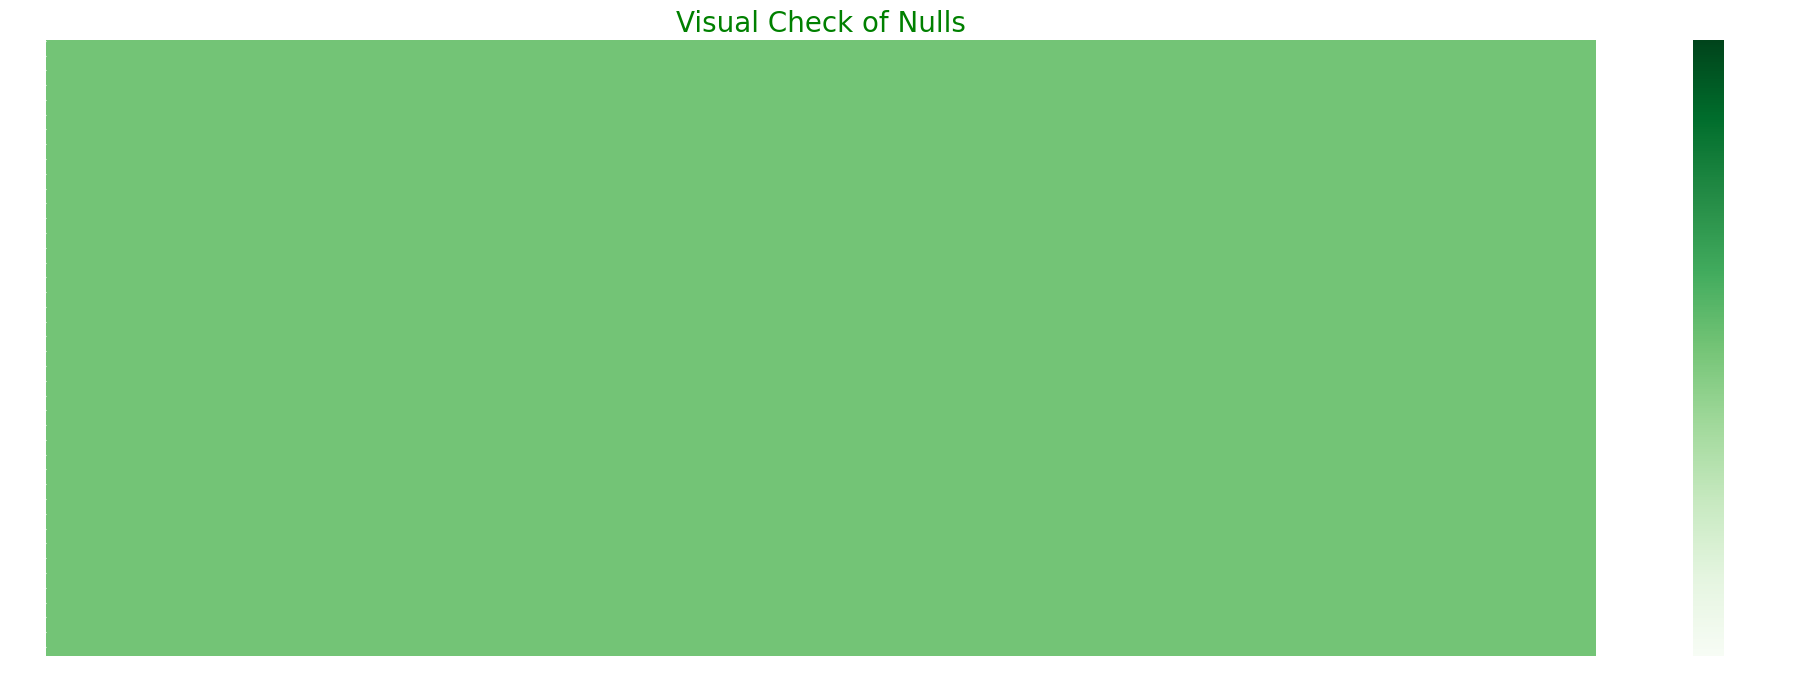

In [25]:
plt.figure(figsize=(25,8))
plt.style.use('dark_background')
sns.heatmap(df.isnull(),cmap='Greens')
plt.title('Visual Check of Nulls',fontsize=20,color='g')
plt.show()

In [26]:
for _ in df.columns:
    print()
    print(f'Total Unique Values in {_} column are :- {df[_].nunique()}')
    print(f'Value counts in {_} column are :-\n {df[_].value_counts(normalize=True)}')
    print()
    print('-'*120)


Total Unique Values in GRE Score column are :- 49
Value counts in GRE Score column are :-
 GRE Score
312    0.048
324    0.046
316    0.036
321    0.034
322    0.034
327    0.034
311    0.032
320    0.032
314    0.032
317    0.030
325    0.030
315    0.026
308    0.026
323    0.026
326    0.024
319    0.024
313    0.024
304    0.024
300    0.024
318    0.024
305    0.022
301    0.022
310    0.022
307    0.020
329    0.020
299    0.020
298    0.020
331    0.018
340    0.018
328    0.018
309    0.018
334    0.016
332    0.016
330    0.016
306    0.014
302    0.014
297    0.012
296    0.010
295    0.010
336    0.010
303    0.010
338    0.008
335    0.008
333    0.008
339    0.006
337    0.004
290    0.004
294    0.004
293    0.002
Name: proportion, dtype: float64

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in TOEFL Score column are :- 29
Value counts in TOEFL Score column are :-
 TOEFL Scor

In [27]:
for _ in df.columns:
    print()
    print(f'Range of {_} column is from {df[_].min()} to {df[_].max()}')
    print()
    print('-'*120)


Range of GRE Score column is from 290 to 340

------------------------------------------------------------------------------------------------------------------------

Range of TOEFL Score column is from 92 to 120

------------------------------------------------------------------------------------------------------------------------

Range of University Rating column is from 1 to 5

------------------------------------------------------------------------------------------------------------------------

Range of SOP column is from 1.0 to 5.0

------------------------------------------------------------------------------------------------------------------------

Range of LOR  column is from 1.0 to 5.0

------------------------------------------------------------------------------------------------------------------------

Range of CGPA column is from 6.8 to 9.92

------------------------------------------------------------------------------------------------------------------------

R

In [28]:
#df['Research'] = df.Research.astype('category')

In [29]:
df.dtypes

,0
GRE Score,int64
TOEFL Score,int64
University Rating,int64
SOP,float64
LOR,float64
CGPA,float64
Research,int64
Chance_of_Admit,float64


----

### Graphical Analysis:

In [30]:
cp = 'Greens'

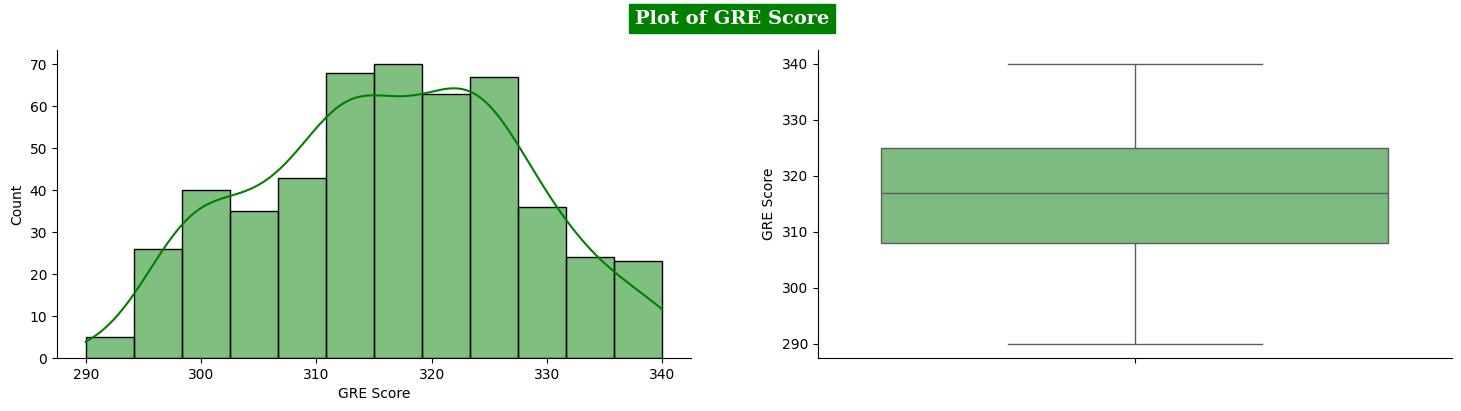

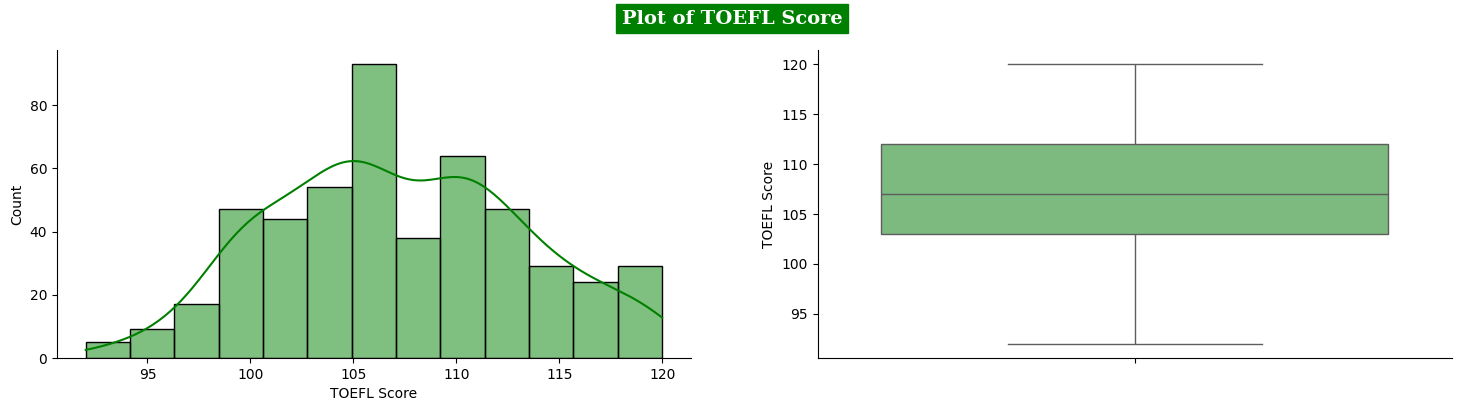

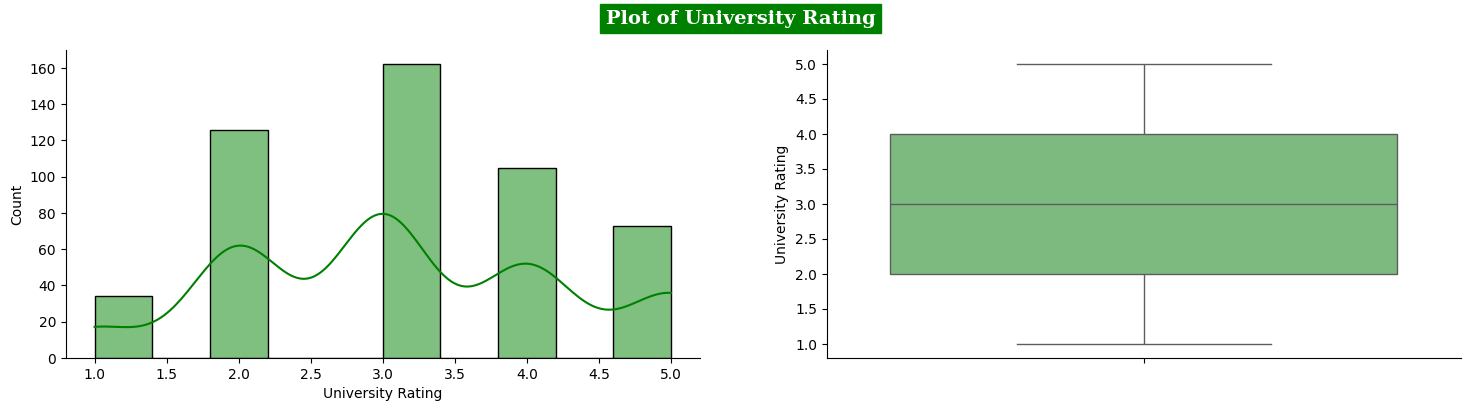

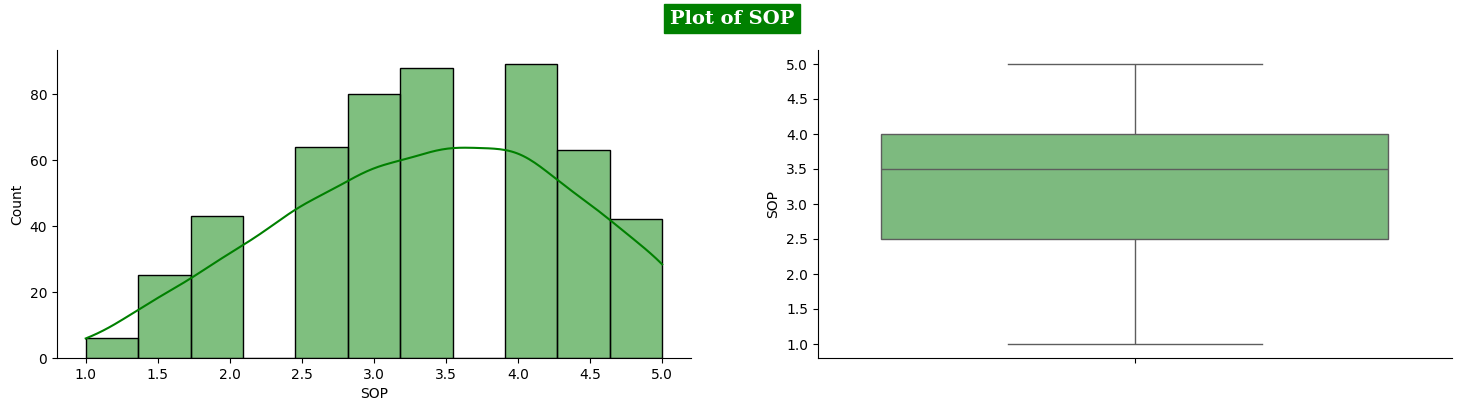

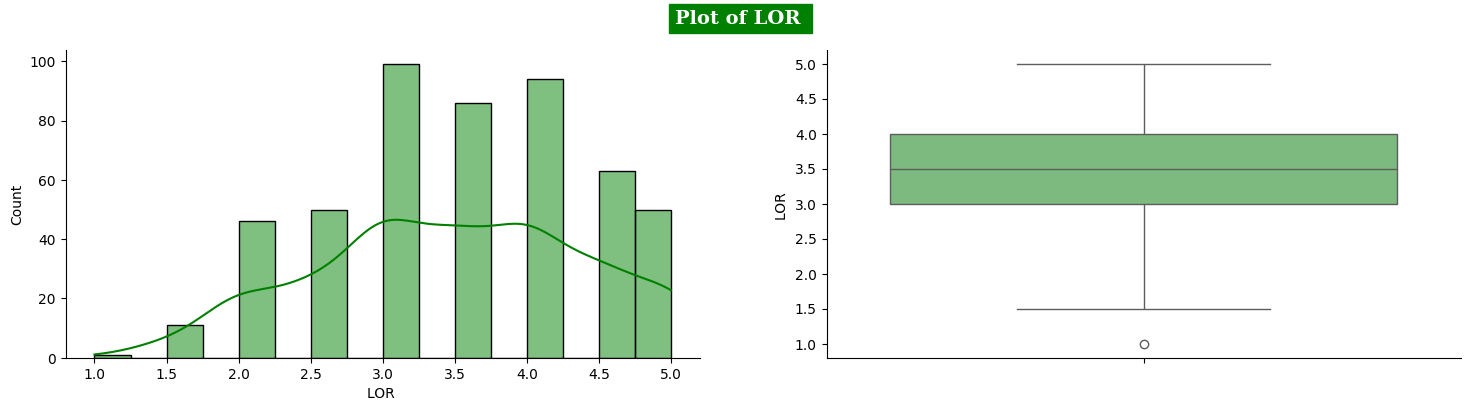

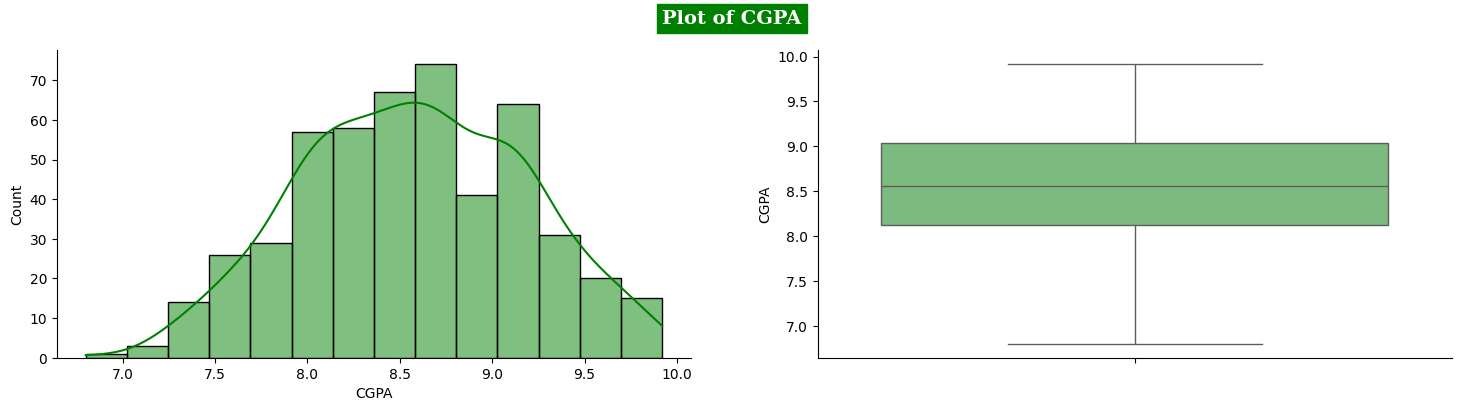

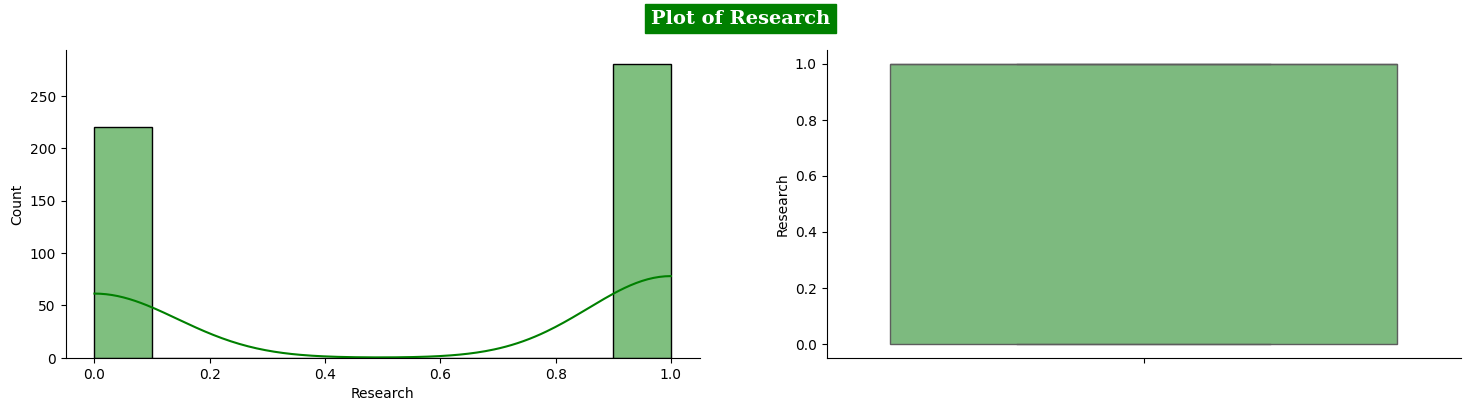

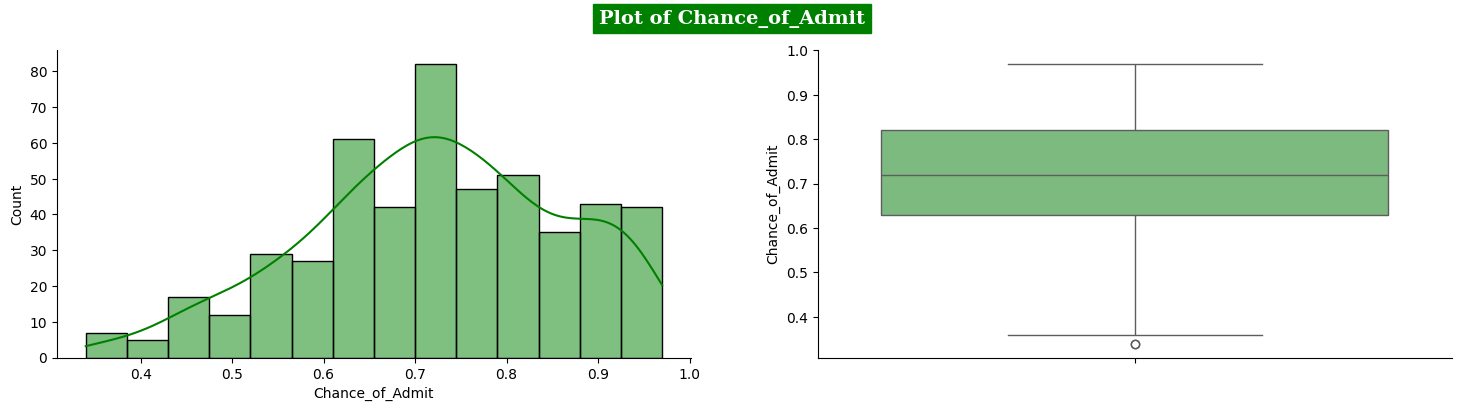

In [31]:
for _ in df.columns:
    plt.style.use('default')
    plt.style.use('seaborn-bright')
    plt.figure(figsize = (18,4))
    plt.subplot(122)
    sns.boxplot(df[_],palette=cp)
    plt.subplot(121)
    sns.histplot(df[_],kde=True,color='g')
    plt.suptitle(f'Plot of {_}',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
    sns.despine()
    plt.show()

#### Insights:
    
- Other than LOR there no outliers found in other features. And there is no need for treating LOR as it is one of the ratings given on scale 0-5.

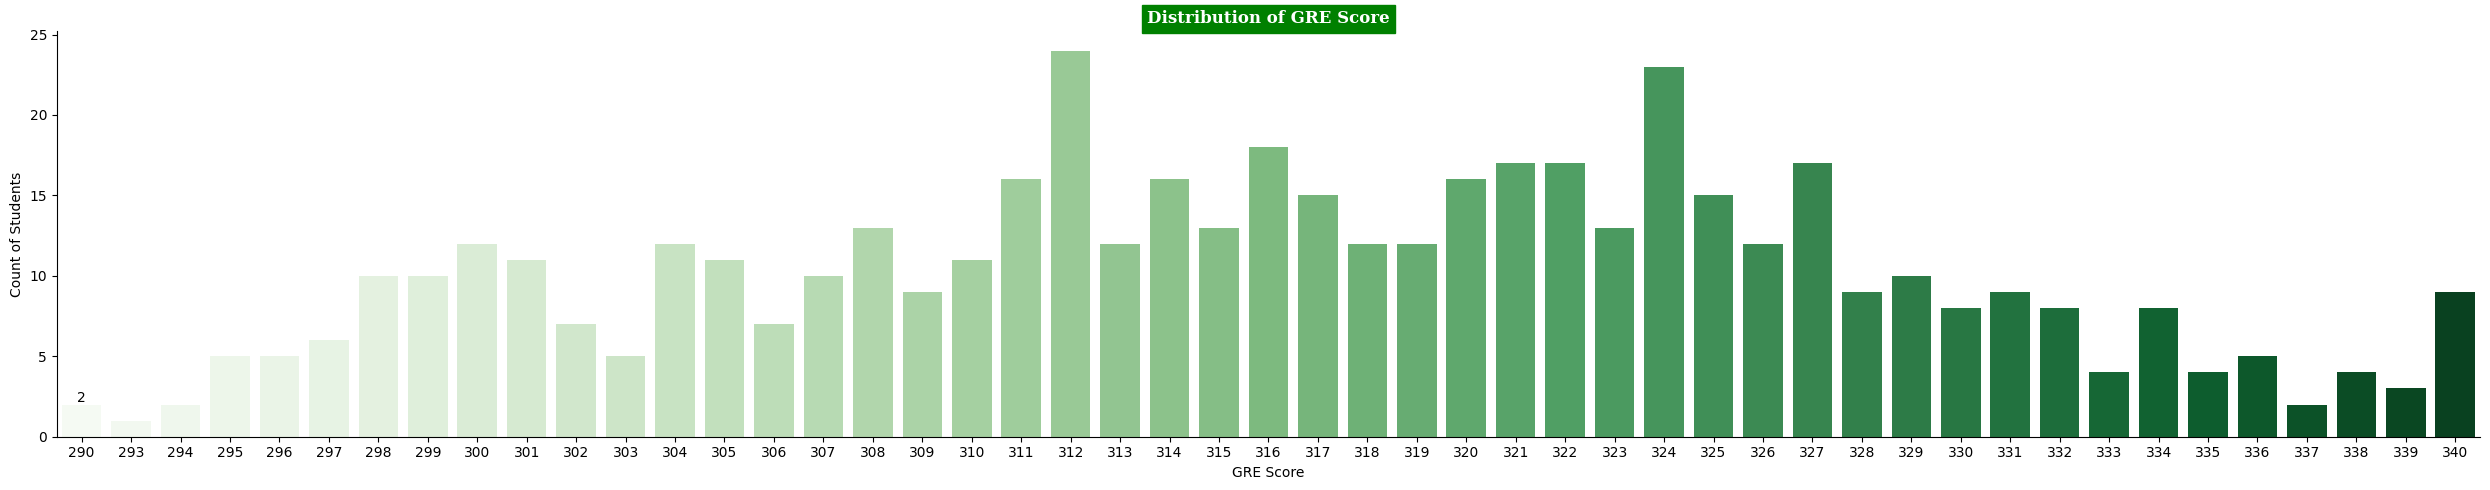

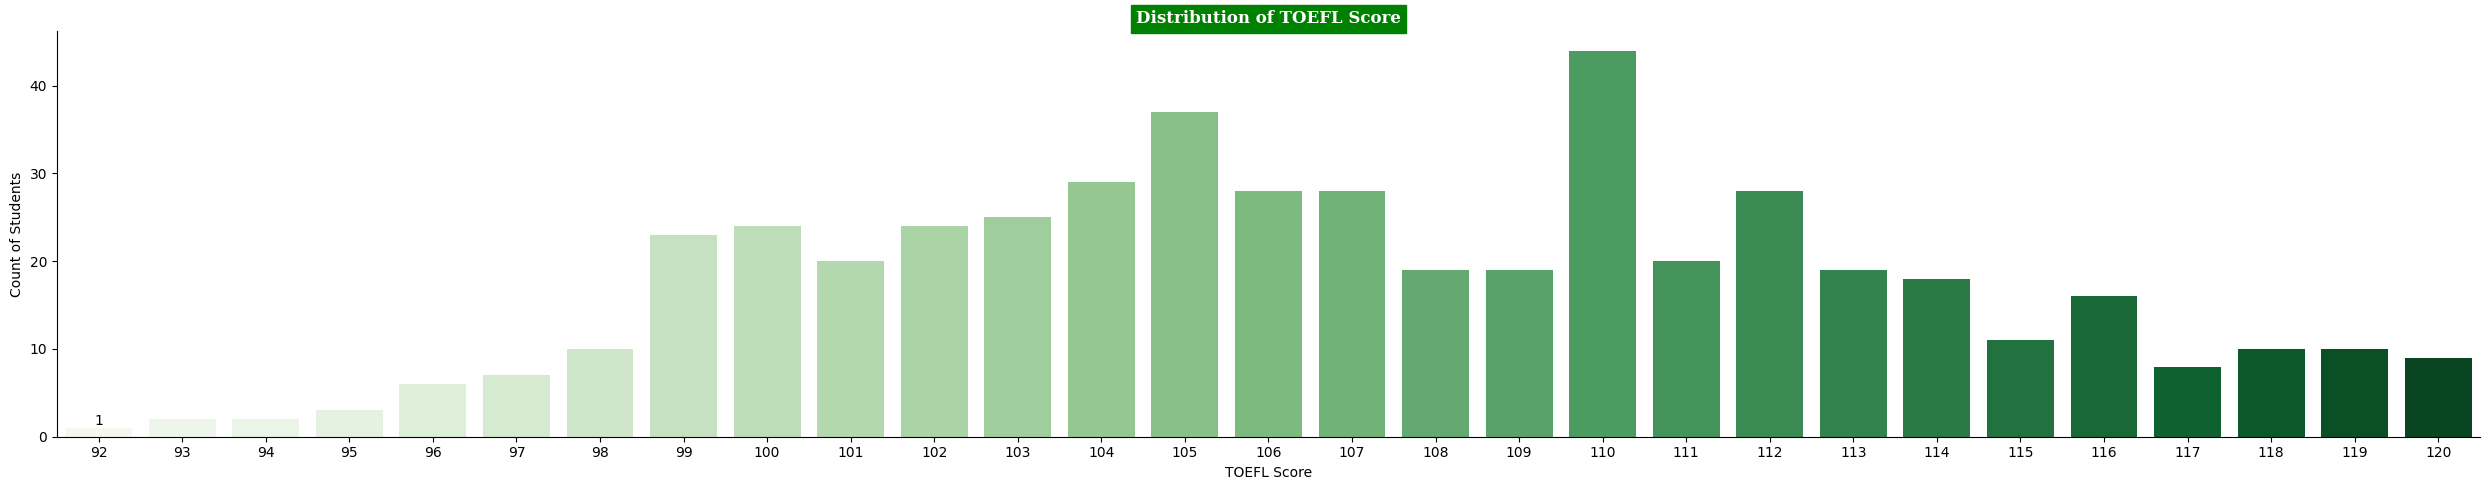

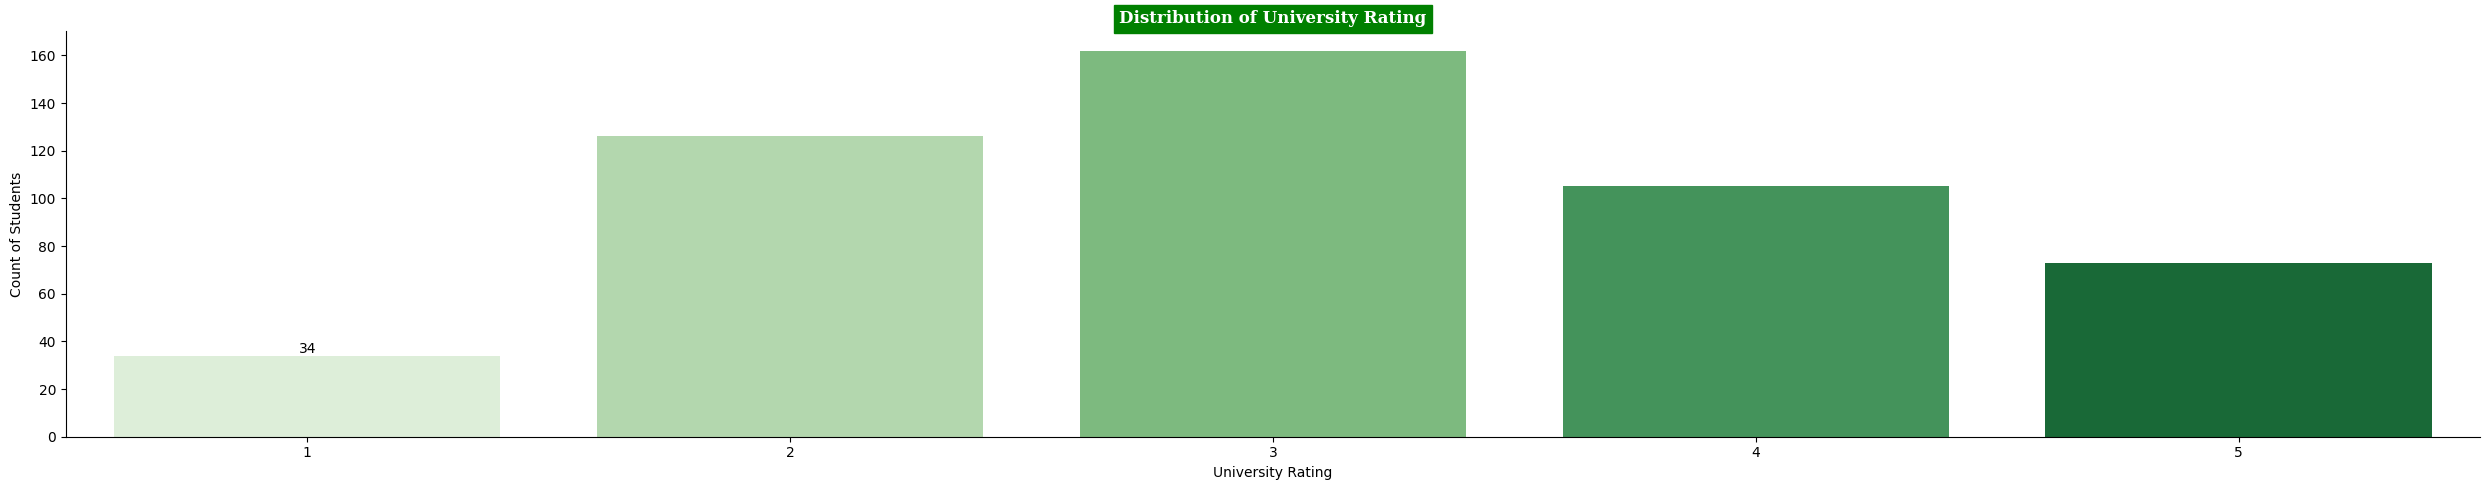

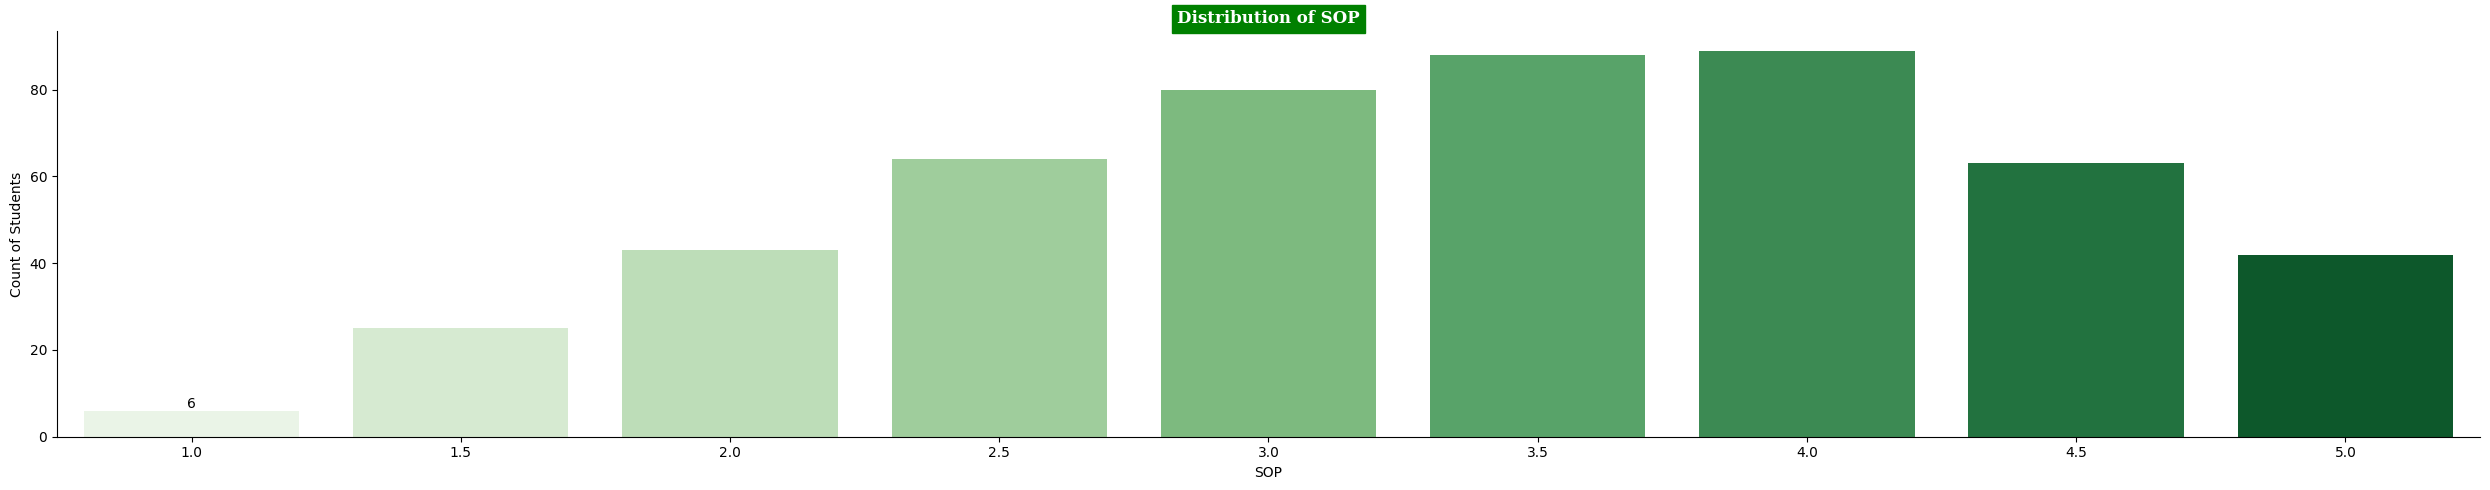

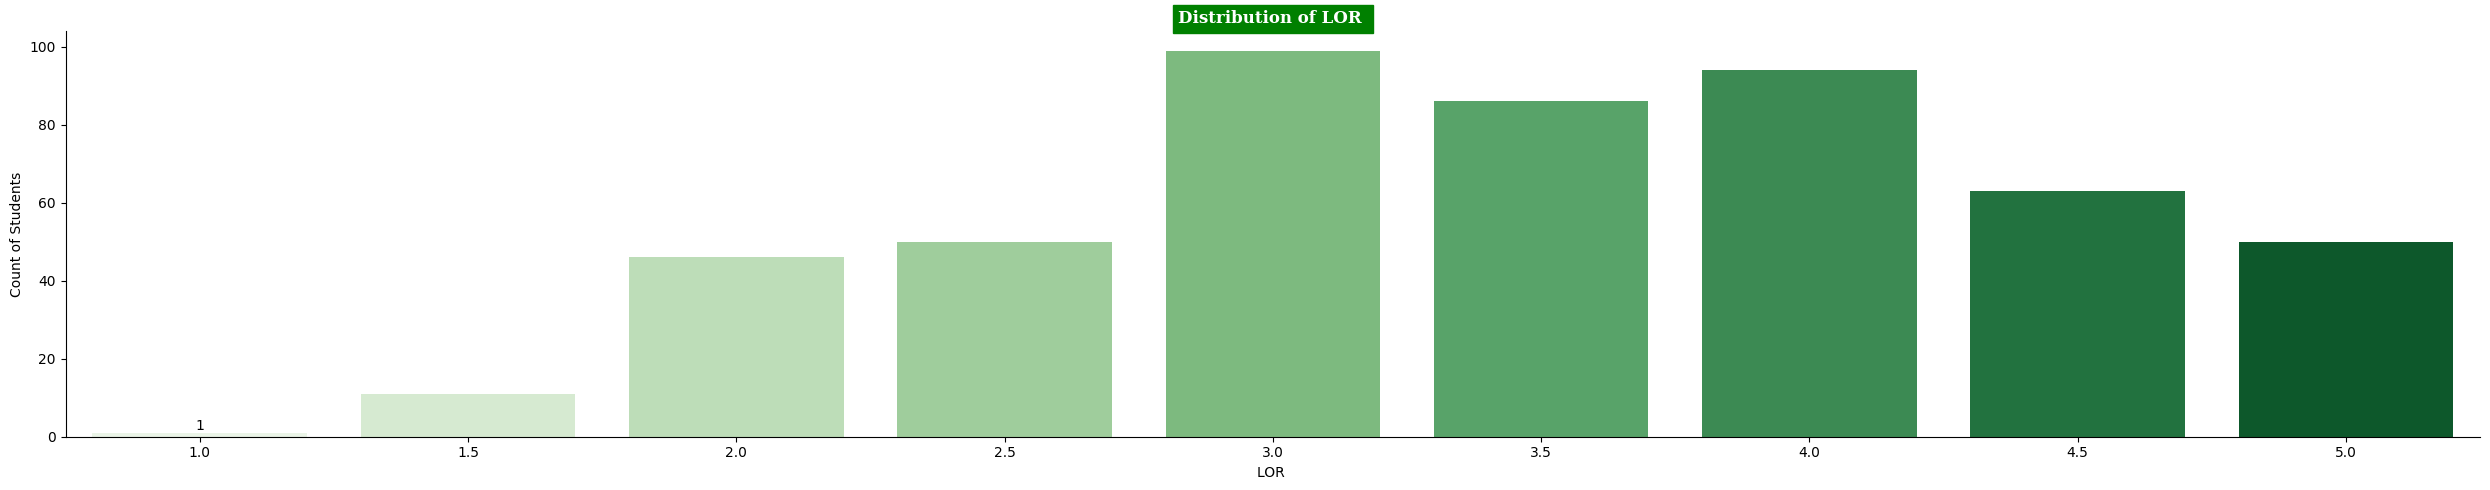

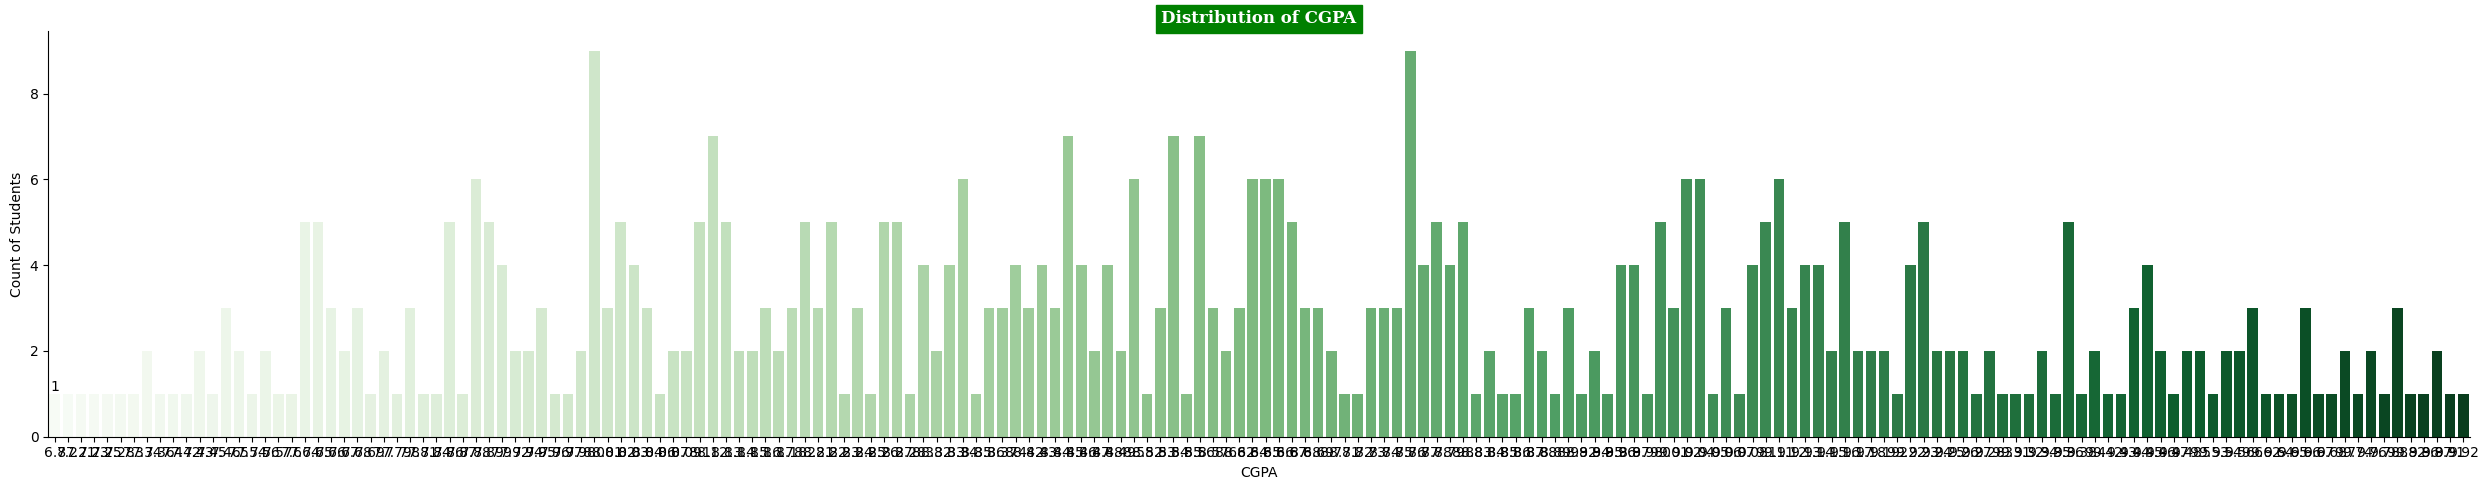

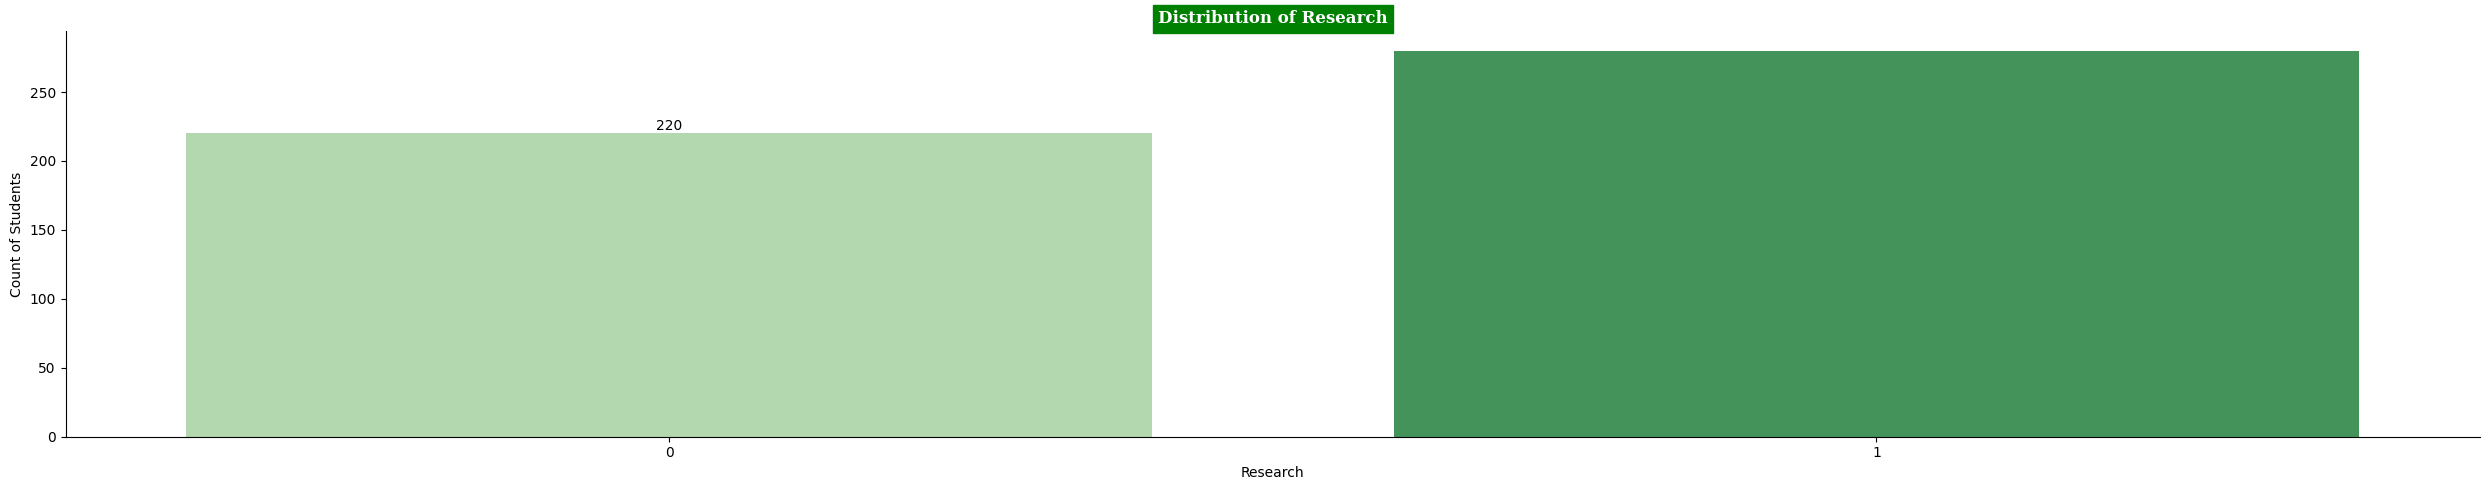

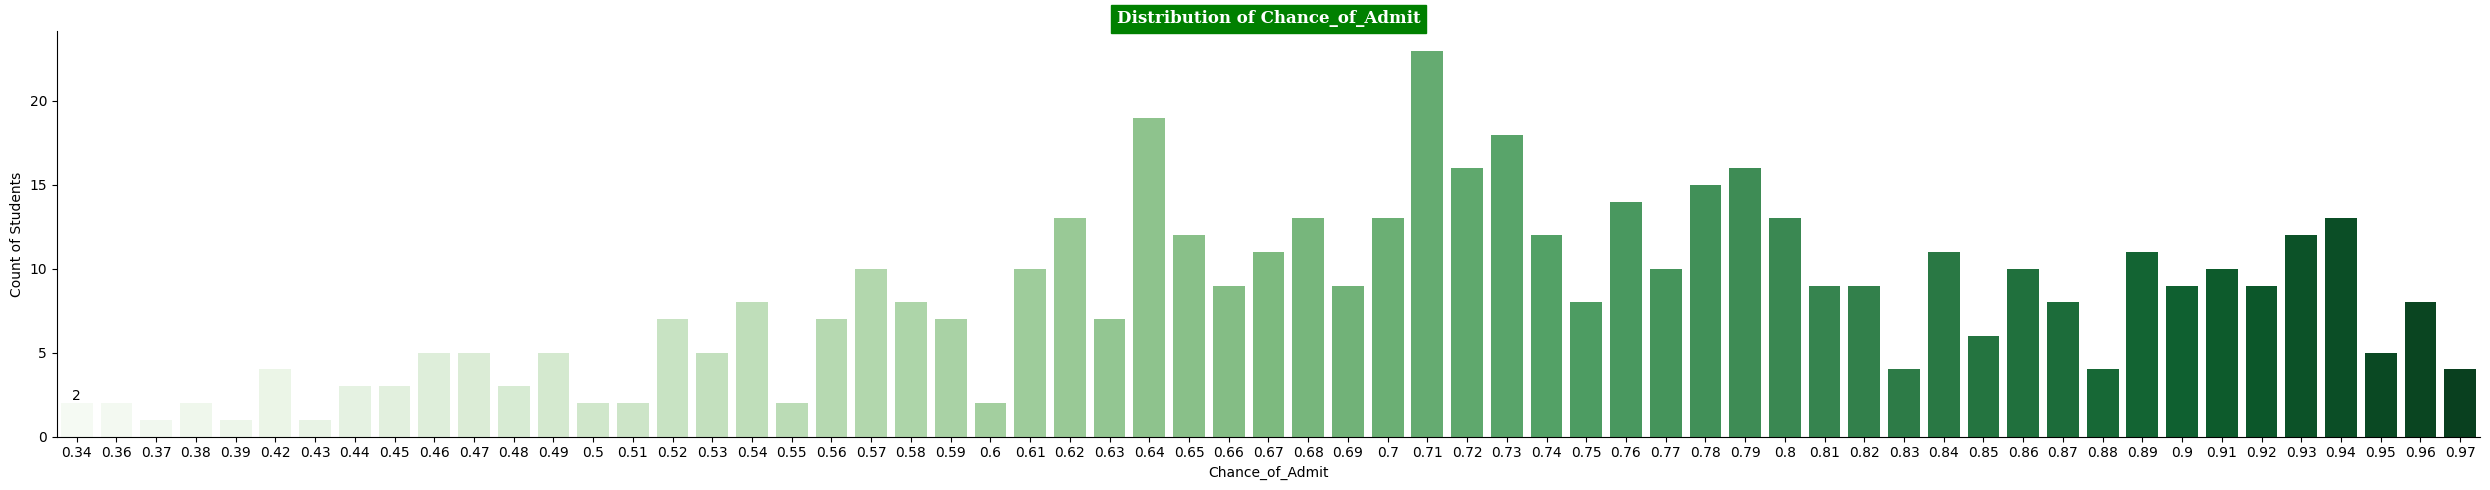

In [32]:
for col in df.columns:
    plt.figure(figsize=(25,5))
    plt.style.use('default')
    plt.style.use('seaborn-bright')
    b = sns.countplot(x=df[col],palette=cp)
    plt.title(f'Distribution of {col}',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
    b.bar_label(b.containers[0], label_type='edge',fmt='%d')
    plt.xlabel(col)
    plt.ylabel('Count of Students')
    plt.tight_layout()
    sns.despine()
    plt.show();

In [33]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

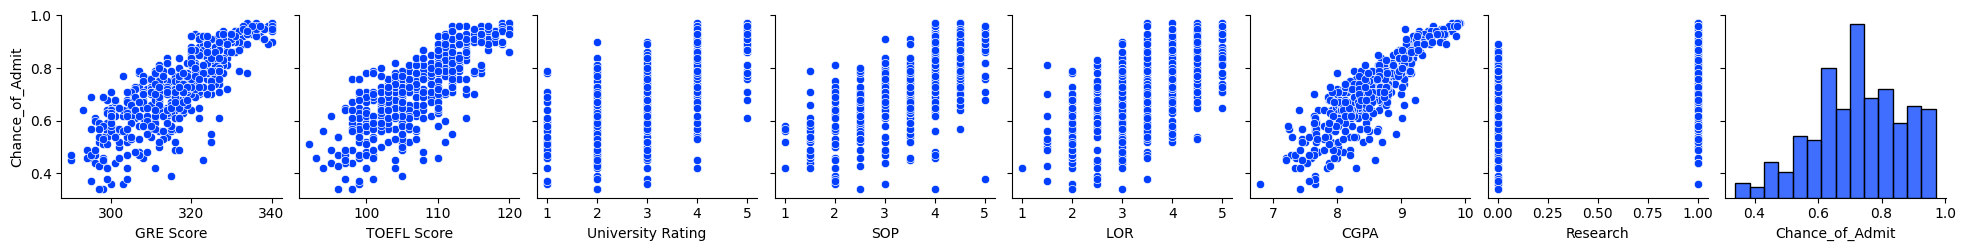

In [34]:
sns.pairplot(data=df, y_vars='Chance_of_Admit')
plt.show()

#### Insights:

* Exam scores (GRE, TOEFL and CGPA) have a high positive correlation with chance of admit
* While university ranking, rating of SOP and LOR also have an impact on chances of admit, research is the only variable which doesn't have much of an impact
* We can see from the scatterplot that the values of university ranking, SOP, LOR and research are not continuous. We can convert these columns to categorical variables

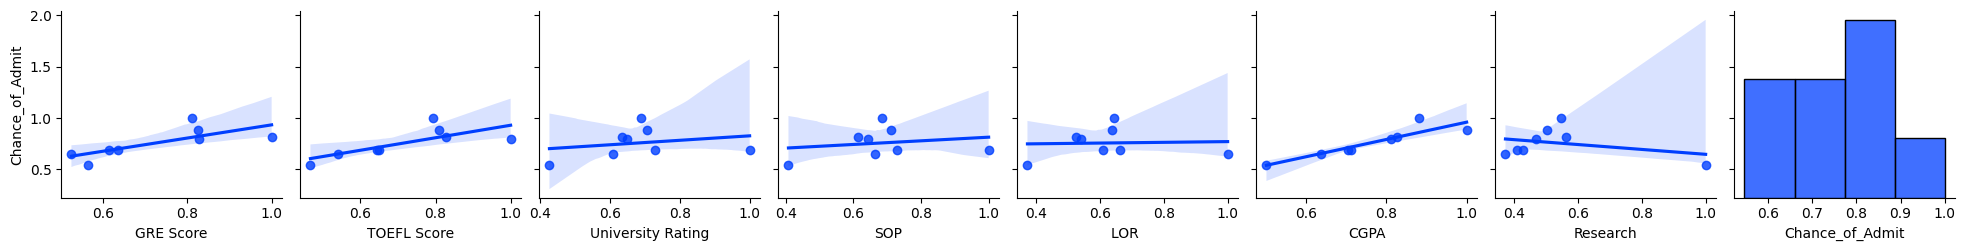

In [35]:
sns.pairplot(df.corr(),y_vars='Chance_of_Admit',kind= 'reg')

In [36]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

GRE Score


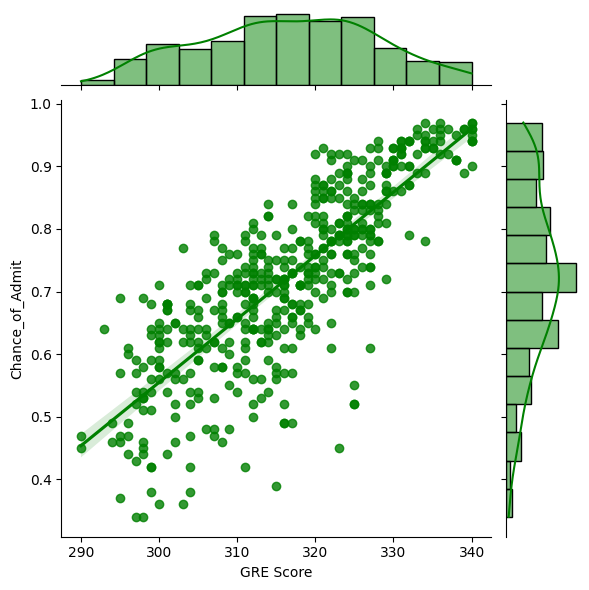

TOEFL Score


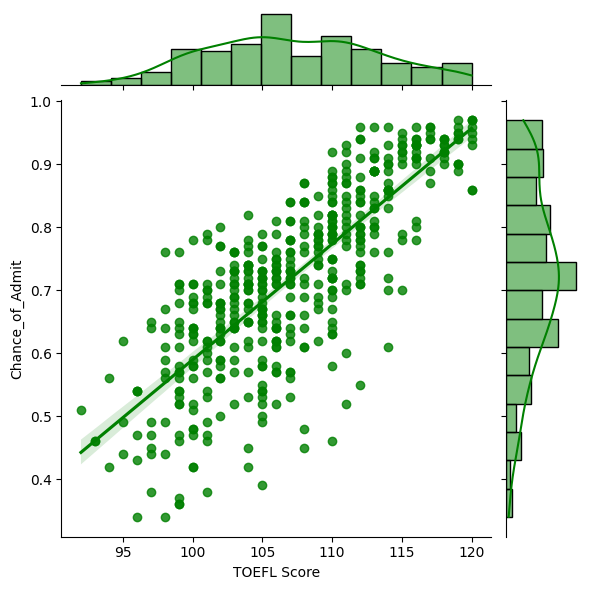

University Rating


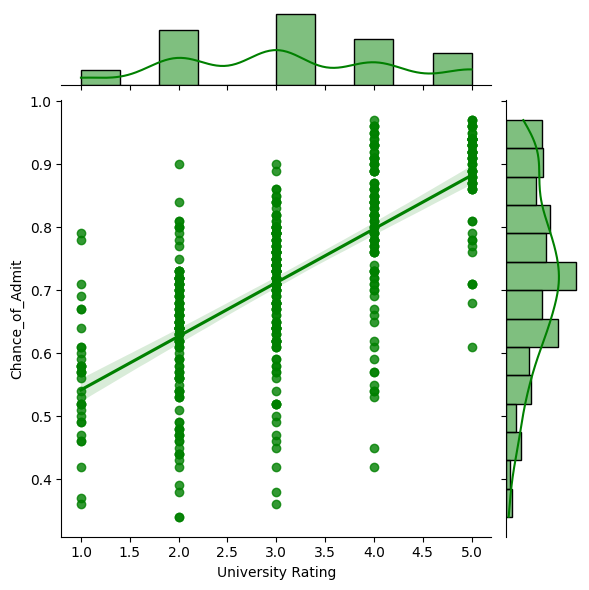

SOP


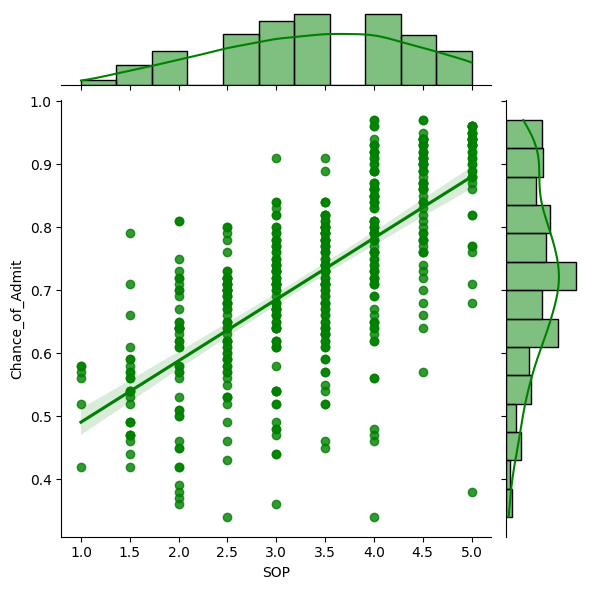

LOR 


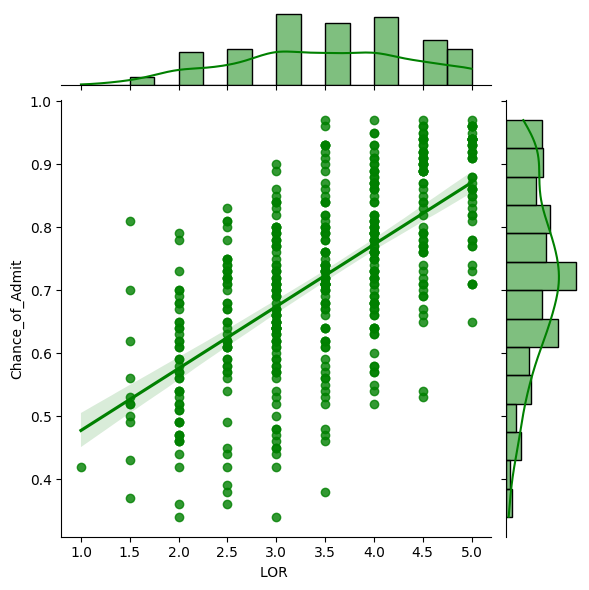

CGPA


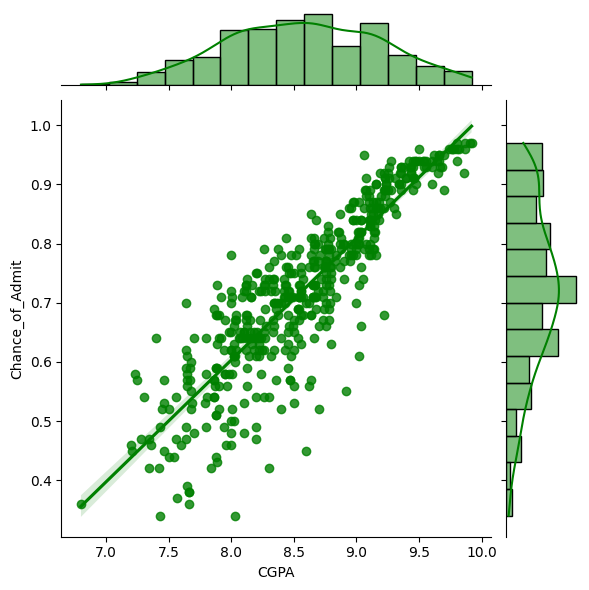

Research


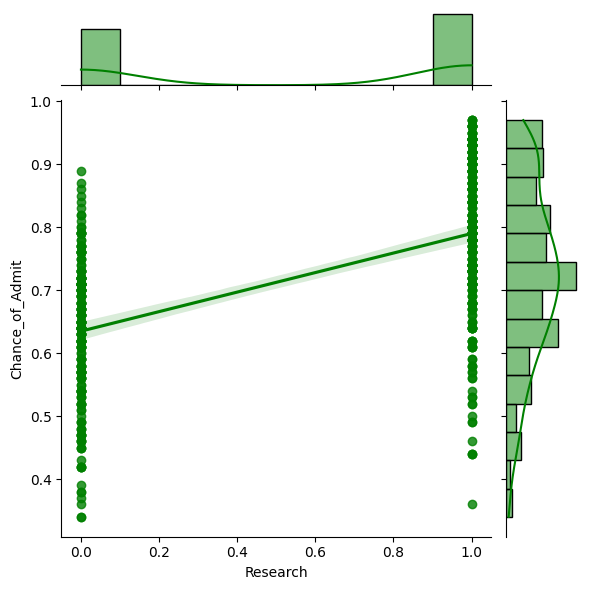

In [37]:
for col in df.columns[:-1]:
    print(col)
    sns.jointplot(data=df,x=df[col],y=df["Chance_of_Admit"],kind="reg",color='g')
    plt.show()

#### Insights:

- with higher GRE score , there is high probability of getting an admition.

- Students having high toefl score , has higher probability of getting admition .

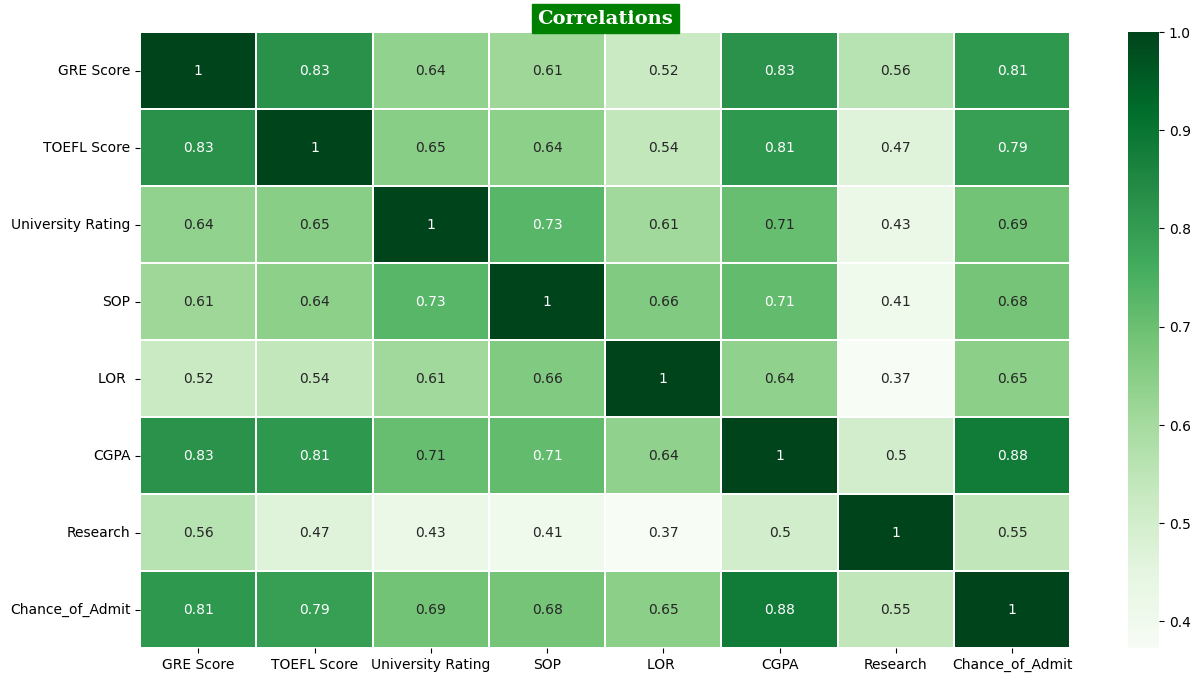

In [38]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'Greens', linewidths = 0.1)#mask=np.triu(df.corr()))
plt.title(f'Correlations',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
plt.yticks(rotation=0)
plt.show()

## Data Preprocessing - Standardization!

In [39]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [40]:
scaled_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.406107
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.271349
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.012340
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.555039
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797
...,...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,0.886405,1.051495
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,0.886405,1.689797
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,0.886405,1.477030
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,-1.128152,0.058582


# Train-Test data split

In [41]:
x = scaled_df.iloc[:,:-1]
y = scaled_df.iloc[:,-1]
print(x.shape , y.shape)

(500, 7) (500,)


In [42]:
# Split the data into training and test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of x_train: (400, 7)
Shape of x_test: (100, 7)
Shape of y_train: (400,)
Shape of y_test: (100,)


## Linear Regression

In [43]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [44]:
# Predicting values for the training and test data
y_pred_train = lr_model.predict(x_train)
y_pred_test = lr_model.predict(x_test)

### r2 score on train data :

In [45]:
r2_score(y_train,y_pred_train)

0.8210671369321554

In [46]:
lr_model.score(x_train,y_train)

0.8210671369321554

### r2 score on test data :

In [47]:
r2_score(y_test,y_pred_test)

0.8188432567829628

In [48]:
lr_model.score(x_test,y_test)

0.8188432567829628

### All the feature's coefficients and Intercept :

In [49]:
lr_model_weights = pd.DataFrame(lr_model.coef_.reshape(1,-1),columns=df.columns[:-1])
lr_model_weights["Intercept"] = lr_model.intercept_
lr_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.194823,0.129095,0.020812,0.012735,0.113028,0.482199,0.084586,0.007736


#### Insights:

* CGPA,GRE,TOEFL scores have the highest weight
* SOP, University rating, and research have the lowest weights
* W0 - intercept is low

In [50]:
def model_evaluation(y_actual, y_forecast, model):
    n = len(y_actual)
    if len(model.coef_.shape)==1:
        p = len(model.coef_)
    else:
        p = len(model.coef_[0])
    MSE = np.round(mean_squared_error(y_true= y_actual,y_pred = y_forecast,squared=True),2)
    MAE = np.round(mean_absolute_error(y_true=y_actual, y_pred=y_forecast),2)
    RMSE = np.round(mean_squared_error(y_true=y_actual,y_pred=y_forecast, squared=False),2)
    #rsme = np.sqrt(mean_squared_error(y_test,y_pred)
    r2 = np.round(r2_score(y_true=y_actual, y_pred=y_forecast),2)
    adj_r2 = np.round(1 - ((1-r2)*(n-1)/(n-p-1)),2)
    return print(f"MSE: {MSE}\nMAE: {MAE}\nRMSE: {RMSE}\nR2 Score: {r2}\nAdjusted R2: {adj_r2}")

In [51]:
model_evaluation(y_train.values, y_pred_train, lr_model)

MSE: 0.18
MAE: 0.3
RMSE: 0.42
R2 Score: 0.82
Adjusted R2: 0.82


In [52]:
model_evaluation(y_test.values, y_pred_test, lr_model)

MSE: 0.19
MAE: 0.3
RMSE: 0.43
R2 Score: 0.82
Adjusted R2: 0.81


#### Insights:

- Since there is `No difference` in the loss scores of training and test data, we can conclude that there is `NO overfitting` of the model.


## Linear Regression using OLS

In [53]:
new_x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, new_x_train)
results = model.fit()

# statstical summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Tue, 13 Aug 2024   Prob (F-statistic):          3.41e-142
Time:                        06:44:01   Log-Likelihood:                -221.69
No. Observations:                 400   AIC:                             459.4
Df Residuals:                     392   BIC:                             491.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0077      0.02

#### Conidering the very low p_valued Features and highly weighted coef features as the major contributers of Model Prediction, `CGPA,GRE,TOEFL,LOR` are the features contributing to model building...

------
## Testing Assumptions of Linear Regression Model

1. **No multicolinearity:**
    >   Multicollinearity check by VIF(Variance Inflation Factor) score.   
    >   Variables are dropped one-by-one till none has a VIF>5.
    
    
2. **Mean of Residuals** should be close to zero.


3. Linear relationship between independent & dependent variables.

    - This can be checked using the following methods:  
        - Scatter plots  
        - Regression plots  
        - Pearson Correlation  
    
    
4. Test for **Homoscedasticity**

    - Create a scatterplot of residuals against predicted values.
    - Perform a Goldfeld-Quandt test to check the presence of
    
    >- **Heteroscedasticity** in the data.  
        - If the obtained `p-value > 0.05`, there is no strong evidence of heteroscedasticity.
    
    
5. Normality of Residuals

    - Almost bell-shaped curve in residuals distribution.
      
        
    
6. Impact of **Outliers**

###  Multicolinearity check:

*VIF (Variance Inflation Factor)* is a measure that quantifies the severity of multicollinearity in a regression analysis.  
It assesses how much the variance of the estimated regression coefficient is inflated due to collinearity.

The formula for VIF is as follows:

`VIF(j) = 1 / (1 - R(j)^2)`

Where:
- j represents the jth predictor variable.
- R(j)^2 is the coefficient of determination (R-squared) obtained from regressing the jth predictor variable on all the other predictor variables.

"
- Calculate the VIF for each variable.
- Identify variables with VIF greater than 5.
- Drop the variable with the highest VIF.
- Repeat steps 1-3 until no variable has a VIF greater than 5.  
"

In [54]:
vif = pd.DataFrame()
vif['Variable'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Variable,VIF
5,CGPA,4.653698
0,GRE Score,4.489201
1,TOEFL Score,3.665067
3,SOP,2.785753
2,University Rating,2.571847
4,LOR,1.977668
6,Research,1.517206


#### Insights:
    
- As the Variance Inflation Factor(VIF) score is less than 5 for all the features we can say that there is no much multicolinearity between the features.

------
### Mean of Residuals:

- The mean of residuals represents the average of residual values in a regression model.
- Residuals are the discrepancies or errors between the observed values and the values predicted by the regression model.  
- The mean of residuals is useful to assess the overall bias in the regression model. If the mean of residuals is close to zero, it indicates that the model is unbiased on average.
- However, if the mean of residuals is significantly different from zero, it suggests that the model is systematically overestimating or underestimating the observed values.
- **The mean of residuals being close to zero indicates that, on average, the predictions made by the linear regression model are accurate, with an equal balance of overestimations and underestimations. This is a desirable characteristic of a well-fitted regression model.**

In [55]:
residuals = y_test.values - y_pred_test

In [56]:
residuals_train = y_train.values - y_pred_train
residuals_train.mean()

9.436895709313831e-18

In [57]:
residuals.mean()

-0.03867840379282768

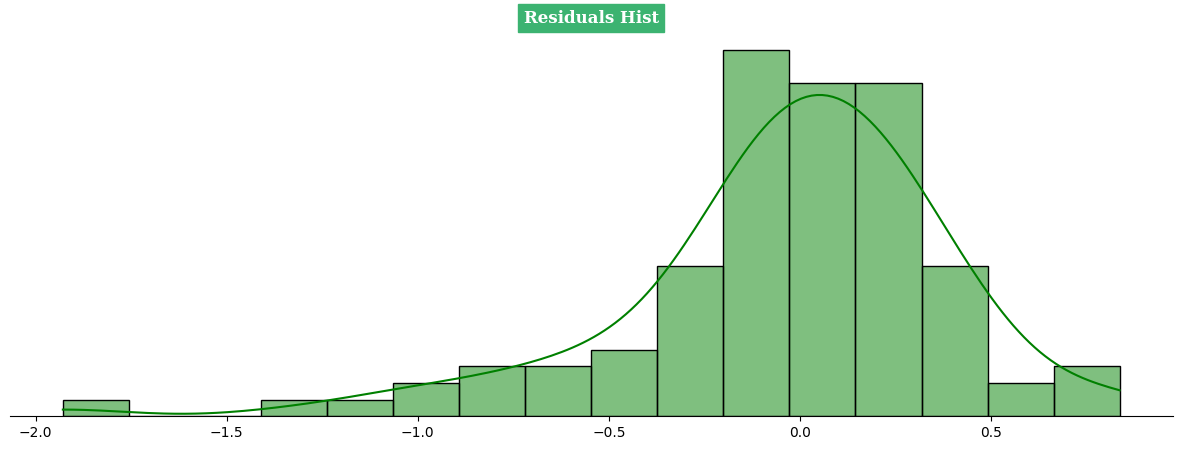

In [58]:
plt.figure(figsize=(15,5))
sns.histplot(residuals, kde= True,color='g')
plt.title('Residuals Hist',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='mediumseagreen',color='w')
sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.show()

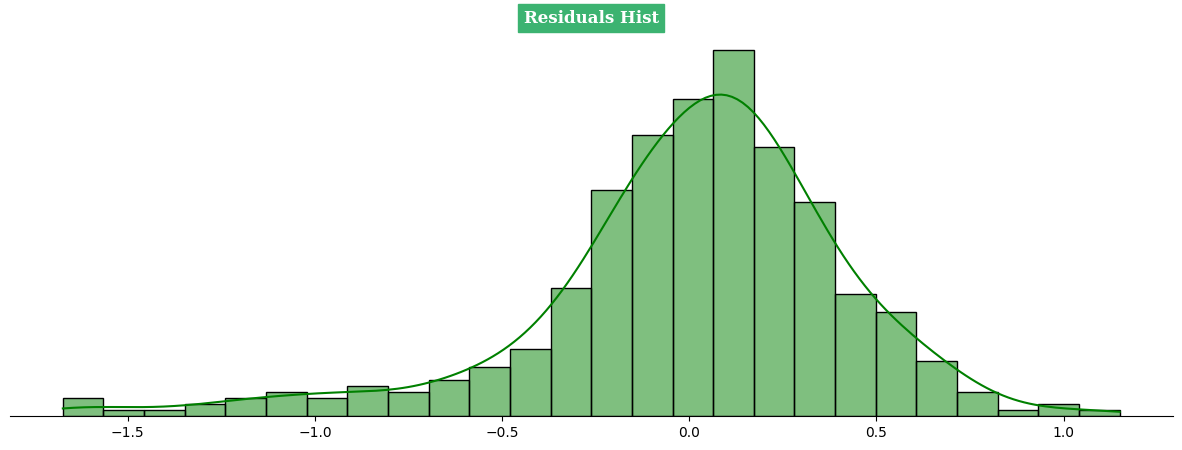

In [59]:
plt.figure(figsize=(15,5))
sns.histplot(residuals_train, kde= True,color='g')
plt.title('Residuals Hist',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='mediumseagreen',color='w')
sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.show()

### Insights:

- Since the mean of residuals is very close to 0, we can say that the model is `UnBiased`.

-----

### Linear Relationships:

Linearity of variables refers to the assumption that there is a linear relationship between the independent variables and the dependent variable in a regression model. It means that the effect of the independent variables on the dependent variable is constant across different levels of the independent variables.

When we talk about "no pattern in the residual plot" in the context of linearity, we are referring to the plot of the residuals (the differences between the observed and predicted values of the dependent variable) against the predicted values or the independent variables.

Ideally, in a linear regression model, the residuals should be randomly scattered around zero, without any clear patterns or trends. This indicates that the model captures the linear relationships well and the assumption of linearity is met.

If there is a visible pattern in the residual plot, it suggests a violation of the linearity assumption. Common patterns that indicate non-linearity include:

1. Curved or nonlinear shape: The residuals form a curved or nonlinear pattern instead of a straight line.
2. U-shaped or inverted U-shaped pattern: The residuals show a U-shape or inverted U-shape, indicating a nonlinear relationship.
3. Funnel-shaped pattern: The spread of residuals widens or narrows as the predicted values or independent variables change, suggesting heteroscedasticity.
4. Clustering or uneven spread: The residuals show clustering or uneven spread across different levels of the predicted values or independent variables.  

If a pattern is observed in the residual plot, it may indicate that the linear regression model is not appropriate, and nonlinear regression or other modeling techniques should be considered. Additionally, transformations of variables, adding interaction terms, or using polynomial terms can sometimes help capture nonlinear relationships and improve linearity in the residual plot.


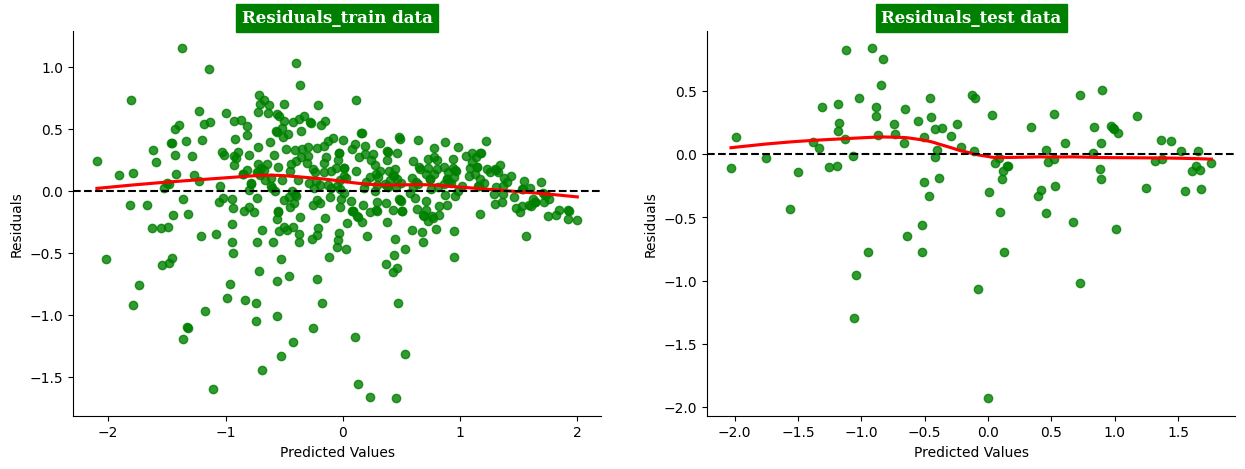

In [60]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Residuals_train data',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
sns.regplot(x=y_pred_train, y=residuals_train, lowess=True, color='g',line_kws={'color': 'red'})
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.subplot(122)
plt.title('Residuals_test data',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
sns.regplot(x=y_pred_test, y=residuals, lowess=True,color='g' ,line_kws={'color': 'red'})
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
sns.despine()
plt.show()

#### Insights:
    
- From the Joint plot & pairplot in the graphical analysis, we can say that there is linear relationship between dependent variable and independent variables.

- As we can observe, GRE Score, TOEFL Score and CGPA have a linear relationship with the Chance of Admit. Although GRE score and TOEFL score are more scattered, CGPA has a much more more linear relationship with the Chance of Admit.

- In a linear regression model, the residuals are randomly scattered around zero, without any clear patterns or trends. This indicates that the model captures the linear relationships well and the assumption of linearity is met.
-----

### Homoscedasticity

Homoscedasticity refers to the assumption in regression analysis that the variance of the residuals (or errors) should be constant across all levels of the independent variables. In simpler terms, it means that the spread of the residuals should be similar across different values of the predictors.

When homoscedasticity is violated, it indicates that the variability of the errors is not consistent across the range of the predictors, which can lead to unreliable and biased regression estimates.

To test for homoscedasticity, there are several graphical and statistical methods that you can use:

1. Residual plot: Plot the residuals against the predicted values or the independent variables. Look for any systematic patterns or trends in the spread of the residuals. If the spread appears to be consistent across all levels of the predictors, then homoscedasticity is likely met.

2. Scatterplot: If you have multiple independent variables, you can create scatter plots of the residuals against each independent variable separately. Again, look for any patterns or trends in the spread of the residuals.

3. Breusch-Pagan Test: This is a statistical test for homoscedasticity. It involves regressing the squared residuals on the independent variables and checking the significance of the resulting model. If the p-value is greater than a chosen significance level (e.g., 0.05), it suggests homoscedasticity. However, this test assumes that the errors follow a normal distribution.

4. Goldfeld-Quandt Test: This test is used when you suspect heteroscedasticity due to different variances in different parts of the data. It involves splitting the data into two subsets based on a specific criterion and then comparing the variances of the residuals in each subset. If the difference in variances is not significant, it suggests homoscedasticity.

It's important to note that the visual inspection of plots is often the first step to identify potential violations of homoscedasticity. Statistical tests can provide additional evidence, but they may have assumptions or limitations that need to be considered.

### **Scatterplot of residuals with each independent variable to check for Homoscedasticity**

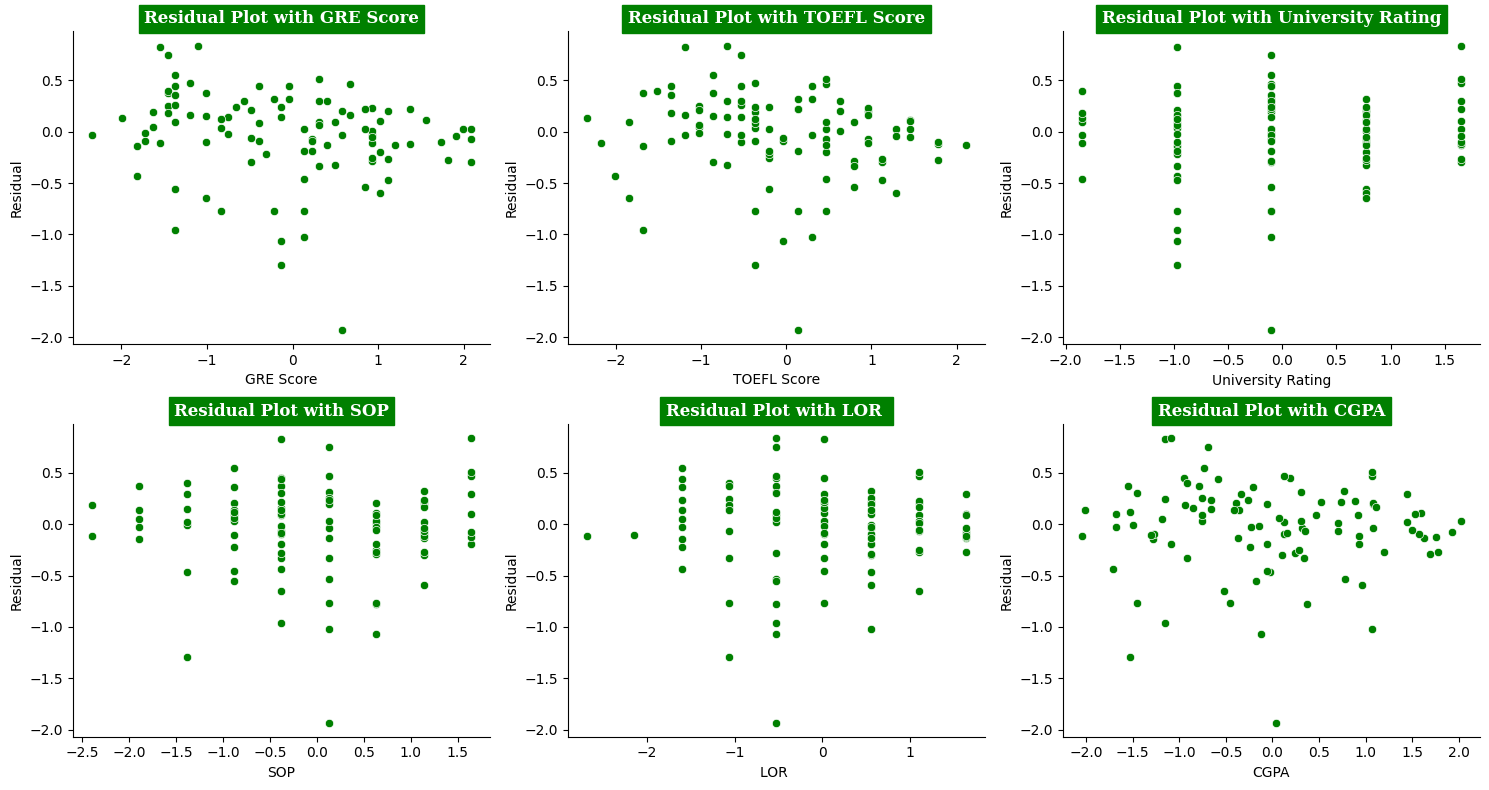

In [61]:
# Scatterplot of residuals with each independent variable to check for Homoscedasticity
plt.figure(figsize=(15,8))
i=1
for col in x_test.columns[:-1]:
    plt.subplot(2,3,i)
    sns.scatterplot(x=x_test[col].values.reshape((-1,)), y=residuals.reshape((-1,)),color='g')
    plt.title(f'Residual Plot with {col}',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
    plt.xlabel(col)
    plt.ylabel('Residual')
    i+=1

plt.tight_layout()
sns.despine()
plt.show();

In [62]:
ols_model = results
predicted = ols_model.predict()
residuals = ols_model.resid

#### ```Breusch-Pagan test for Homoscedasticity```

Null Hypothesis -- H0 : Homoscedasticity is present in residuals.    
Alternate Hypothesis --  Ha : Heteroscedasticity is present in residuals.  
alpha : 0.05

In [63]:
bp_test = pd.DataFrame(sms.het_breuschpagan(residuals, ols_model.model.exog),
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])
bp_test

,value
Lagrange multiplier statistic,25.155866
p-value,0.000712
f-value,3.758171
f p-value,0.000588


#### Insights:

- Since we do not see any significant change in the spread of residuals with respect to change in independent variables, we can conclude that `Homoscedasticity is met`.

- Since the p-value is much lower than the alpha value, we can `Reject the null hypothesis` and conclude that ***`Heteroscedasticity is present`***

- Since the p-value is significantly less than the conventional significance level (e.g., 0.05), we reject the null hypothesis of homoscedasticity. This suggests that there is evidence of heteroscedasticity in the residuals, indicating that the variance of the residuals is not constant across all levels of the independent variables.

- This violation of the homoscedasticity assumption may affect the validity of the linear regression model's results.

> It's important to consider alternative modeling approaches or corrective measures to address this issue.
-----

### Normality of Residuals:

Normality of residuals refers to the assumption that the residuals (or errors) in a statistical model are normally distributed. Residuals are the differences between the observed values and the predicted values from the model.

The assumption of normality is important in many statistical analyses because it allows for the application of certain statistical tests and the validity of confidence intervals and hypothesis tests. When residuals are normally distributed, it implies that the errors are random, unbiased, and have consistent variability.

To check for the normality of residuals, you can follow these steps:

> `Residual Histogram`: Create a histogram of the residuals and visually inspect whether the shape of the histogram resembles a bell-shaped curve. If the majority of the residuals are clustered around the mean with a symmetric distribution, it suggests normality.

> `Q-Q Plot (Quantile-Quantile Plot)`: This plot compares the quantiles of the residuals against the quantiles of a theoretical normal distribution. If the points in the Q-Q plot are reasonably close to the diagonal line, it indicates that the residuals are normally distributed. Deviations from the line may suggest departures from normality.

> `Shapiro-Wilk Test`: This is a statistical test that checks the null hypothesis that the residuals are normally distributed. The Shapiro-Wilk test calculates a test statistic and provides a p-value. If the p-value is greater than the chosen significance level (e.g., 0.05), it suggests that the residuals follow a normal distribution. However, this test may not be reliable for large sample sizes.  
    >> **`Anderson-Darling or Jarque_Bera`** can also be done as data size increases.
  
> `Skewness and Kurtosis`: Calculate the skewness and kurtosis of the residuals. Skewness measures the asymmetry of the distribution, and a value close to zero suggests normality. Kurtosis measures the heaviness of the tails of the distribution compared to a normal distribution, and a value close to zero suggests similar tail behavior.

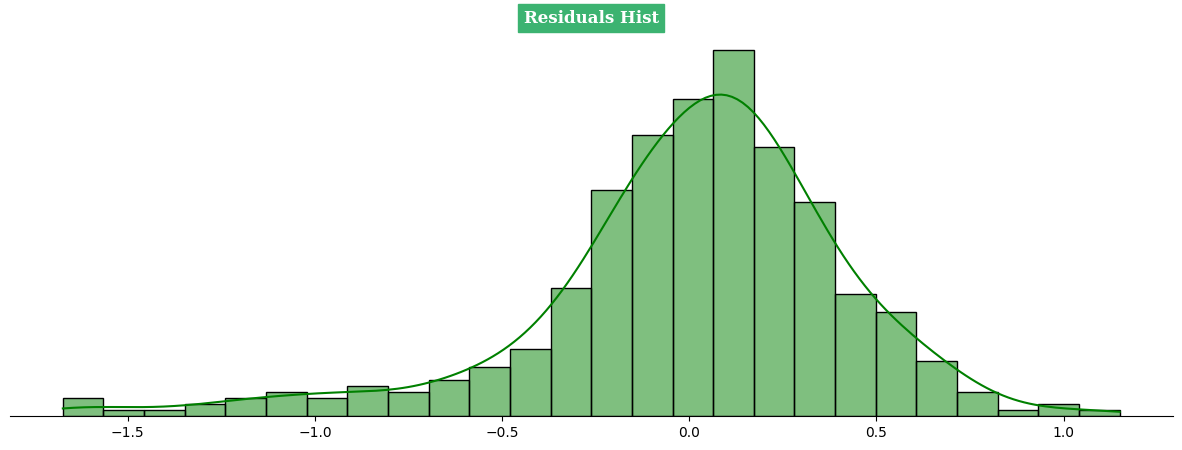

In [64]:
plt.figure(figsize=(15,5))
sns.histplot(residuals, kde= True,color='g')
plt.title('Residuals Hist',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='mediumseagreen',color='w')
sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.show()

<Figure size 1500x500 with 0 Axes>

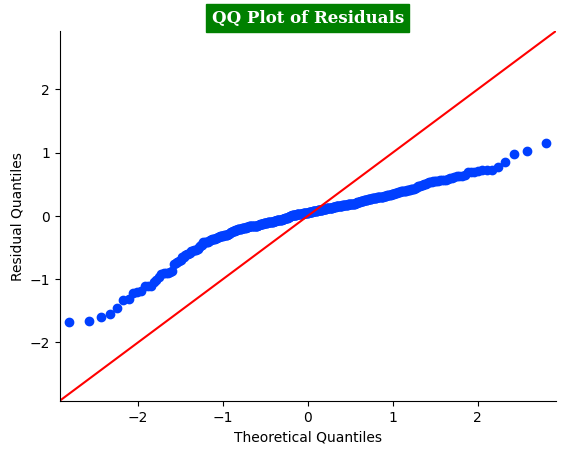

In [65]:
# QQ-Plot of residuals
plt.figure(figsize=(15,5))
sm.qqplot(residuals,line='45')
plt.title('QQ Plot of Residuals',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
plt.ylabel('Residual Quantiles')
sns.despine()
plt.show();

### JARQUE BERA test:

In [66]:
jb_stat, jb_p_value = stats.jarque_bera(residuals)


print("Jarque-Bera Test Statistic:", jb_stat)
print("p-value:", jb_p_value)

if jb_p_value < 0.05:
    print("Reject the null hypothesis: Residuals are not normally distributed.")
else:
    print("Fail to reject the null hypothesis: Residuals are normally distributed.")

Jarque-Bera Test Statistic: 190.09887364276915
p-value: 5.25477446043155e-42
Reject the null hypothesis: Residuals are not normally distributed.


#### Insights:

- From the Histplot & kdeplot , we can see that the Residuals are `left skewed` and not perfectly normally distributed.

- The QQ plot shows that residuals are slightly deviating from the straight diagonal , thus not `Gaussian`.

- From Jarque Bera test , we conclude that the Residuals are `Not Normally distributed`.

> Hence this assumption is not met.

-----

## Lasso and Ridge Regression - L1 & L2 Regularization

Ridge and Lasso regression are both regularization techniques used to prevent overfitting in linear regression models. They work by adding a penalty term to the cost function, which helps to control the complexity of the model by shrinking the coefficient values.

**Lasso Regression:**
Lasso regression uses L1 regularization, where the penalty term is the sum of the absolute values of the coefficients multiplied by a regularization parameter (lambda or alpha). Lasso regression has the ability to shrink some coefficients to exactly zero, effectively performing feature selection. This makes Lasso regression useful when dealing with high-dimensional data where only a few variables are relevant.

**Ridge Regression:**
Ridge regression uses L2 regularization, where the penalty term is the squared sum of the coefficients multiplied by a regularization parameter (lambda or alpha). The regularization term helps to reduce the impact of less important features on the model and prevents them from dominating the model. Ridge regression can help in reducing the variance of the model and is particularly useful when dealing with multicollinearity (high correlation between independent variables).

The main differences between Ridge and Lasso regression are:

* Ridge regression tends to shrink all coefficient values towards zero, but it rarely makes them exactly zero. On the other hand, Lasso regression can make coefficient values exactly zero, performing variable selection.
* Ridge regression is suitable when dealing with multicollinearity, as it will shrink correlated variables together. Lasso regression, however, can select one variable from a set of highly correlated variables and make the others zero.

In [67]:
model_lasso = Lasso(alpha=0.45)
model_lasso.fit(x_train, y_train)

Lasso(alpha=0.45)

#### ***reason for (alpha) ... try giving just lasso()... Weights are all zero.. inorder to manipulate that we introduce an alpha...***
In Lasso regression, the alpha parameter (λ) controls the strength of regularization. It's typically written as a positive value greater than 0. The choice of alpha affects the amount of shrinkage applied to the coefficients.

You would specify the alpha value when initializing the Lasso regression model. Typically, you would experiment with different alpha values to find the one that best balances model complexity and performance on your dataset through techniques like cross-validation.

For example, if you're using scikit-learn in Python, you would set the alpha parameter when creating the Lasso regression model object, like this:

```python
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=λ)
```

Here, `alpha` is set to 0.1, but you can adjust it based on your experimentation and validation results. Lower values of alpha result in less regularization, potentially leading to overfitting, while higher values increase regularization, potentially improving generalization to unseen data.

In [68]:
model_ridge = Ridge()
model_ridge.fit(x_train, y_train)

Ridge()

In [69]:
y_pred_train_ridge = model_ridge.predict(x_train)
y_pred_test_ridge = model_ridge.predict(x_test)

y_pred_train_lasso = model_lasso.predict(x_train)
y_pred_test_lasso = model_lasso.predict(x_test)

In [70]:
lasso_model_weights = pd.DataFrame(model_lasso.coef_.reshape(1,-1),columns=df.columns[:-1])
lasso_model_weights["Intercept"] = model_lasso.intercept_
lasso_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.019231,0.0,0.0,0.0,0.0,0.408647,0.0,0.013919


In [71]:
ridge_model_weights = pd.DataFrame(model_ridge.coef_.reshape(1,-1),columns=df.columns[:-1])
ridge_model_weights["Intercept"] = model_ridge.intercept_
ridge_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.195584,0.130073,0.021575,0.013802,0.113221,0.478123,0.084673,0.007726


In [72]:
print('Linear Regression Training Accuracy\n')
model_evaluation(y_train.values, y_pred_train, lr_model)
print('*'*25)
print('\nLinear Regression Test Accuracy\n')
model_evaluation(y_test.values, y_pred_test, lr_model)
print('---'*25)
print('\nRidge Regression Training Accuracy\n')
model_evaluation(y_train.values, y_pred_train_ridge, model_ridge)
print('*'*25)
print('\n\nRidge Regression Test Accuracy\n')
model_evaluation(y_test.values, y_pred_test_ridge, model_ridge)
print('---'*25)
print('\n\nLasso Regression Training Accuracy\n')
model_evaluation(y_train.values, y_pred_train_lasso, model_lasso)
print('*'*25)
print('\n\nLasso Regression Test Accuracy\n')
model_evaluation(y_test.values, y_pred_test_lasso, model_lasso)
print('---'*25)

Linear Regression Training Accuracy

MSE: 0.18
MAE: 0.3
RMSE: 0.42
R2 Score: 0.82
Adjusted R2: 0.82
*************************

Linear Regression Test Accuracy

MSE: 0.19
MAE: 0.3
RMSE: 0.43
R2 Score: 0.82
Adjusted R2: 0.81
---------------------------------------------------------------------------

Ridge Regression Training Accuracy

MSE: 0.18
MAE: 0.3
RMSE: 0.42
R2 Score: 0.82
Adjusted R2: 0.82
*************************


Ridge Regression Test Accuracy

MSE: 0.19
MAE: 0.3
RMSE: 0.43
R2 Score: 0.82
Adjusted R2: 0.81
---------------------------------------------------------------------------


Lasso Regression Training Accuracy

MSE: 0.43
MAE: 0.52
RMSE: 0.65
R2 Score: 0.57
Adjusted R2: 0.56
*************************


Lasso Regression Test Accuracy

MSE: 0.43
MAE: 0.51
RMSE: 0.65
R2 Score: 0.58
Adjusted R2: 0.55
---------------------------------------------------------------------------


### observation:

* While Linear Regression and Ridge regression have similar scores, Lasso regression has not performed well on both training and test data

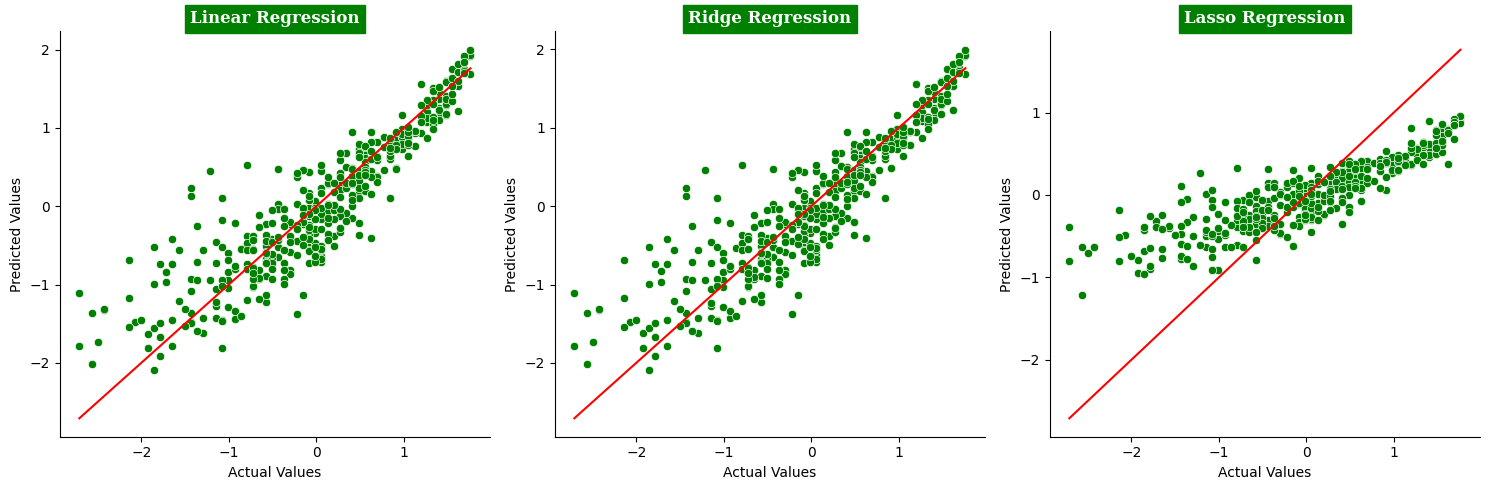

In [73]:
actual_values = y_train.values.reshape((-1,))
predicted_values = [y_pred_train.reshape((-1,)), y_pred_train_ridge.reshape((-1,)), y_pred_train_lasso.reshape((-1,))]
model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
plt.figure(figsize=(15,5))
i=1
for preds in predicted_values:
    plt.subplot(1,3,i)
    sns.scatterplot(x=actual_values, y=preds,color='g')
    plt.plot([np.min(actual_values), np.max(actual_values)], [np.min(actual_values), np.max(actual_values)], 'r-')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(model[i-1],fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
    i+=1
plt.tight_layout()
sns.despine()
plt.show();

#### Insights:
- We can observe that both `Linear Regression` and `Ridge Regression` have similar accuracy while Lasso regression has oversimplified the model.

- This is the reason that the r2 score of Lasso regression is 0. It doesn't capture any variance in the target variable. It has predicted the same value across all instances.
----

### ElasticNet regression:

Elastic Net regression is a type of regression analysis that combines penalties from both Lasso (L1 regularization) and Ridge (L2 regularization) methods. It is particularly useful when dealing with datasets that have high dimensionality and multicollinearity (correlation between predictors).

Here's how Elastic Net works:

1. **Objective Function**: In Elastic Net regression, the objective function includes two components: the residual sum of squares (RSS), which measures the difference between the observed and predicted values, and two penalty terms: one for L1 regularization and one for L2 regularization.

2. **L1 Regularization (Lasso)**: The L1 penalty encourages sparsity in the coefficient estimates by adding the absolute values of the coefficients to the objective function. This tends to force some coefficients to be exactly zero, effectively performing feature selection.

3. **L2 Regularization (Ridge)**: The L2 penalty adds the squared values of the coefficients to the objective function. This tends to shrink the coefficients towards zero, but it does not enforce sparsity as strongly as L1 regularization.

4. **Mixing Parameter (α)**: Elastic Net introduces a mixing parameter, α (alpha), which controls the balance between L1 and L2 regularization. When α = 0, Elastic Net reduces to Ridge regression, and when α = 1, it reduces to Lasso regression. Intermediate values of α allow for a combination of both penalties.

5. **Regularization Strength (λ)**: Additionally, Elastic Net includes a regularization strength parameter, λ (lambda), which controls the overall strength of regularization. Higher values of λ result in stronger regularization, leading to more shrinkage of coefficients.

Benefits of Elastic Net regression include:

- **Feature Selection**: Like Lasso regression, Elastic Net can perform automatic feature selection by setting some coefficients to zero.
- **Handling Multicollinearity**: Like Ridge regression, Elastic Net can handle multicollinearity by shrinking the coefficients of correlated predictors.
- **Flexibility**: The mixing parameter α allows for a flexible trade-off between L1 and L2 regularization, offering more control over the type of regularization applied.

However, Elastic Net also has some drawbacks, such as the need to tune hyperparameters like α and λ, and it may be computationally more expensive compared to simpler regression methods.

Overall, Elastic Net regression is a powerful technique for regression analysis, especially in situations where there are many predictors with potentially correlated features. It strikes a balance between the strengths of Lasso and Ridge regression, offering flexibility and improved performance in certain scenarios.

***we have to find alpha... find the value such that loss is minimum***
Finding the optimal alpha value for ElasticNet regression typically involves techniques like cross-validation. Here's a general approach to finding the optimal alpha value:

1. **Define a Range of Alpha Values:** Start by defining a range of alpha values to search over. This range should cover a broad spectrum of possibilities, from very small values (close to 0) to larger values.

2. **Cross-Validation:** Use k-fold cross-validation to evaluate the performance of the ElasticNet regression model for each alpha value in the defined range. For each fold, train the model on the training data and evaluate its performance on the validation data.

3. **Select the Best Alpha:** Choose the alpha value that results in the best performance metric on the validation set. This metric could be mean squared error (MSE), mean absolute error (MAE), R-squared, or another appropriate metric depending on your specific problem.

4. **Final Model:** Once you have selected the best alpha value using cross-validation, retrain the ElasticNet regression model using the entire training dataset and the chosen alpha value. This will be your final model.

Here's an example of how you can perform cross-validated grid search for alpha value in scikit-learn:

```python
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# Define a range of alpha values to search over
alpha_range = [0.001, 0.01, 0.1, 1.0, 10.0]

# Create ElasticNet regression model
elastic_net = ElasticNet()

# Define grid search parameters
param_grid = {'alpha': alpha_range}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
```

In this example, `alpha_range` defines the range of alpha values to search over. Grid search is performed with 5-fold cross-validation, and the best alpha value is selected based on the mean squared error (MSE) metric. Adjust the `alpha_range` according to your problem domain and dataset characteristics.

-- same for lasso and ridge as well

> Here i did manual calculations for alpha

In [74]:
ElasticNet_model = ElasticNet(alpha=0.108)
ElasticNet_model.fit(x_train , y_train)

ElasticNet(alpha=0.108)

In [75]:
y_pred_train_en = ElasticNet_model.predict(x_train)
y_pred_test_en = ElasticNet_model.predict(x_test)

In [76]:
train_R2 = ElasticNet_model.score(x_train,y_train)
test_R2 = ElasticNet_model.score(x_test,y_test)
train_R2 , test_R2

(0.814348667393518, 0.8153699952125264)

In [77]:
en_model_weights = pd.DataFrame(ElasticNet_model.coef_.reshape(1,-1),columns=df.columns[:-1])
en_model_weights["Intercept"] = ElasticNet_model.intercept_
en_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.194912,0.13349,0.025508,0.02075,0.091694,0.418398,0.058465,0.007728


In [78]:
print('ElasticNet Regression Training Accuracy\n')
model_evaluation(y_train.values, y_pred_train_en, ElasticNet_model)
print('*'*25)
print('\nElasticNet Regression Test Accuracy\n')
model_evaluation(y_test.values, y_pred_test_en, ElasticNet_model)
print('---'*25)

ElasticNet Regression Training Accuracy

MSE: 0.18
MAE: 0.31
RMSE: 0.43
R2 Score: 0.81
Adjusted R2: 0.81
*************************

ElasticNet Regression Test Accuracy

MSE: 0.19
MAE: 0.3
RMSE: 0.44
R2 Score: 0.82
Adjusted R2: 0.81
---------------------------------------------------------------------------


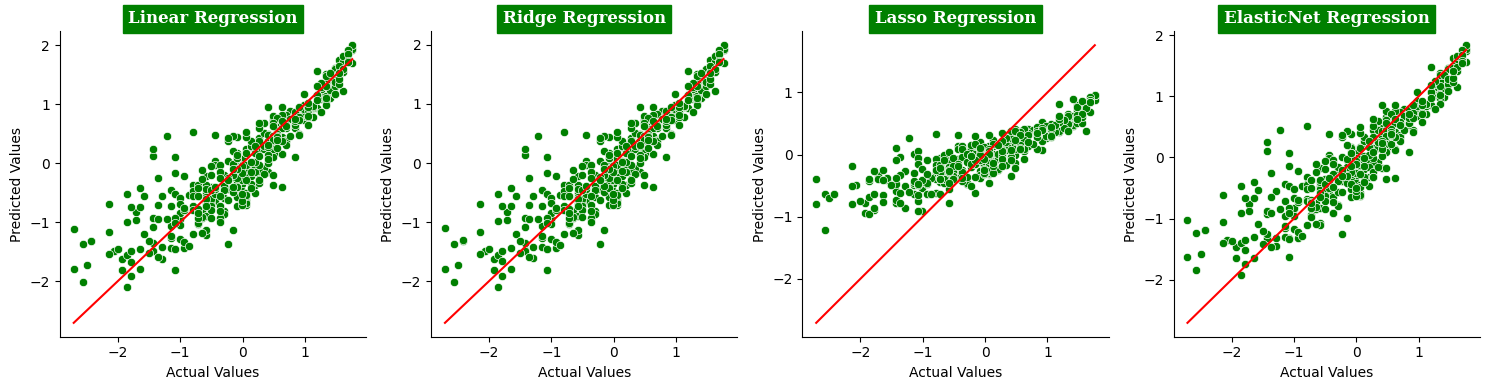

In [79]:
actual_values = y_train.values.reshape((-1,))
predicted_values = [y_pred_train.reshape((-1,)), y_pred_train_ridge.reshape((-1,)),
                    y_pred_train_lasso.reshape((-1,)),y_pred_train_en.reshape((-1,))]
model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression','ElasticNet Regression']
plt.figure(figsize=(15,4))
i=1
for preds in predicted_values:
    plt.subplot(1,4,i)
    sns.scatterplot(x=actual_values, y=preds,color='g')
    plt.plot([np.min(actual_values), np.max(actual_values)], [np.min(actual_values), np.max(actual_values)], 'r-')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(model[i-1],fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
    i+=1
plt.tight_layout()
sns.despine()
plt.show();

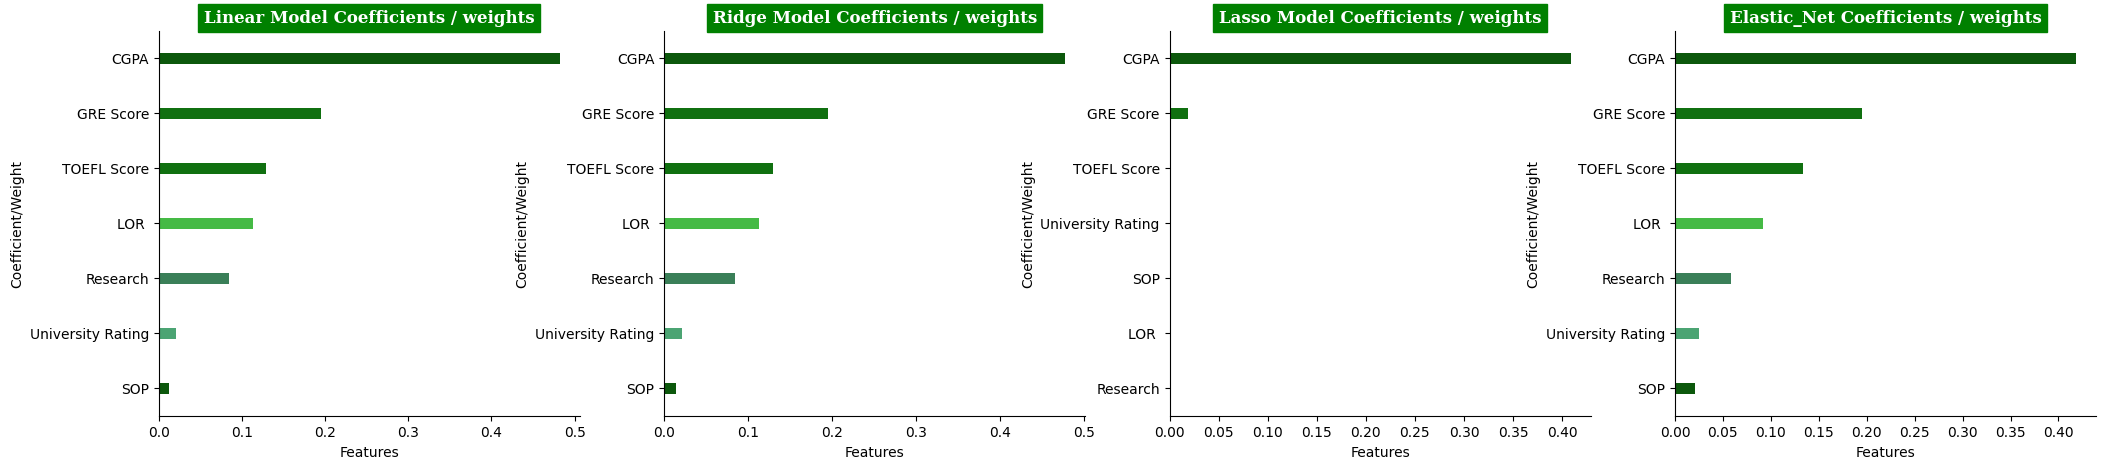

In [80]:
model_major_weights = {"Linear Model":lr_model_weights,
                       "Ridge Model":ridge_model_weights,
                       "Lasso Model":lasso_model_weights,
                       "Elastic_Net":en_model_weights}
# excluding w0-intercept
plt.figure(figsize=(25,5))
i=1
for model,data in model_major_weights.items():
    model_weights_data = data.melt()

    plt.subplot(1,4,i)
    sns.barplot(data=model_weights_data[:-1].sort_values(by='value',ascending=False),
                y='variable', x='value',width=0.2,palette=['darkgreen','g','green','limegreen','seagreen','mediumseagreen'])
    plt.xlabel('Features')
    plt.ylabel('Coefficient/Weight')
    plt.title(f'{model} Coefficients / weights',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
    i+=1
sns.despine()
plt.show()

## <span style="color:seagreen"><strong>Regression Analysis Summary:</strong></span>

> * Upon conducting regression analysis, it's evident that CGPA emerges as the most influential feature in predicting admission chances.

> * Additionally, GRE and TOEFL scores also exhibit significant importance in the predictive model.

> * Following the initial regression model, a thorough check for multicollinearity was performed, revealing VIF scores consistently below 5, indicative of low multicollinearity among predictors.

> * Despite the absence of high multicollinearity, it's noteworthy that the residuals do not conform perfectly to a normal distribution. Furthermore, the residual plots indicate some level of heteroscedasticity.

> * Subsequent exploration involving regularized models such as Ridge and Lasso regression showcased comparable results to the Linear Regression Model.

> * Moreover, employing ElasticNet (L1+L2) regression yielded results consistent with the other regression models, further reinforcing the predictive capabilities of the features under consideration.

## <span style="color:mediumseagreen"><strong>Business Insights & Recommendations</strong></span>

### <span style="color:seagreen"><strong>Insights:</strong></span>

> <span style="color:lawngreen"><strong>Model Predictors:</strong></span>   
- Our analysis identified several key predictors strongly correlated with admission chances. Notably, **GRE score, TOEFL score, and CGPA** emerged as significant factors influencing admission probabilities.

> <span style="color:lawngreen"><strong>Multicollinearity Check:</strong></span>  
- Assessing multicollinearity revealed no significant issues, indicating the robustness of our model despite high correlations among predictors.

> <span style="color:lawngreen"><strong>Model Performance:</strong></span>
- Both Linear Regression and Ridge Regression models exhibited promising performance, capturing up to 82% of the variance in admission probabilities.

> <span style="color:lawngreen"><strong>Data Distribution:</strong></span>
- Exploratory data analysis uncovered left-skewed distributions in admission probabilities and strong positive correlations between exam scores and admission chances.


### <span style="color:seagreen"><strong>Recommendations:</strong></span>

> <span style="color:lawngreen"><strong>Feature Enhancement:</strong></span>
- Encourage students to focus on improving GRE scores, CGPA, and the quality of Letters of Recommendation (LOR), as these factors significantly influence admission chances.

> <span style="color:lawngreen"><strong>Data Augmentation:</strong></span>
- Collect a wider range of data beyond academic metrics to capture applicants' holistic profiles, including extracurricular achievements, personal statements, and diversity factors.


> <span style="color:lawngreen"><strong>Additional Features:</strong></span>
- Given the strong correlation among CGPA, we can enrich the predictive model with additional diverse features such as Research, work experience, internships, or extracurricular activities.


By implementing these recommendations, we can further enhance our admissions process, providing valuable insights and support to both applicants and educational institutions.

-----